In [2]:
#!pip install pyarrow

In [1]:
from astropy.io import fits
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from specutils import Spectrum1D, SpectralRegion
import astropy.units as u
from tqdm import tqdm
from astropy.nddata import StdDevUncertainty


In [2]:
archivo_fits = fits.open('2022-03-20T01_13_27.761624-s-rich.sp.fits')#'Rich-Stars-Table.fits') #open file
imagen = archivo_fits[0]

In [3]:
type(imagen)

astropy.io.fits.hdu.image.PrimaryHDU

In [4]:
archivo_fits.info()

Filename: 2022-03-20T01_13_27.761624-s-rich.sp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (2048, 39, 11)   float64   


In [5]:
header_imagen = imagen.header
header_imagen

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                   39                                                  
NAXIS3  =                   11                                                  
EXTEND  =                    T                                                  
HIERARCH MJD =    59658.05911761139                                             
HIERARCH MBJD =    59658.06083902933                                            
HIERARCH SHUTTER START DATE = '2022-03-20'                                      
HIERARCH SHUTTER START UT = '01:13:27.761624'                                   
HIERARCH TEXP (S) =               1400.0                                        
HIERARCH BARYCENTRIC CORRECT

In [6]:
archivo_fits[0].columns

AttributeError: 'PrimaryHDU' object has no attribute 'columns'

In [27]:
tabla = archivo_fits[1].data

IndexError: list index out of range

In [25]:
tabla.columns          # Objetos column
#tabla.columns.names    # Nombres de las columnas
#tabla.columns.info()   # informacion general

array([[[6.97391971e+03, 6.97399317e+03, 6.97406663e+03, ...,
         7.10652257e+03, 7.10657732e+03, 7.10663206e+03],
        [6.85956901e+03, 6.85964130e+03, 6.85971357e+03, ...,
         6.99004345e+03, 6.99009732e+03, 6.99015117e+03],
        [6.74890836e+03, 6.74897950e+03, 6.74905063e+03, ...,
         6.87731969e+03, 6.87737270e+03, 6.87742569e+03],
        ...,
        [4.35869198e+03, 4.35873779e+03, 4.35878360e+03, ...,
         4.44163380e+03, 4.44166810e+03, 4.44170240e+03],
        [4.31378135e+03, 4.31382666e+03, 4.31387198e+03, ...,
         4.39582508e+03, 4.39585902e+03, 4.39589296e+03],
        [4.26978904e+03, 4.26983388e+03, 4.26987871e+03, ...,
         4.35094975e+03, 4.35098334e+03, 4.35101693e+03]],

       [[2.58391035e+03, 2.75930930e+03, 2.46598384e+03, ...,
         6.03248255e+02, 3.70543980e+02, 5.08488627e+02],
        [2.82210825e+03, 2.71501479e+03, 2.78042893e+03, ...,
         5.95152546e+02, 3.65294947e+02, 4.84674660e+02],
        [2.70017927e+03, 

**Name:** Los nombres de las estrellas

**ID:** los identificadores en el catalogo TYC

**RA [hms]:** Ascensión Recta

**DEC [dms]:** Declinación

**RV:** Velocidades radiales

**ST:** Tipo espectral

**Vmag:** Magnitud en V (en el visible)

In [26]:
Tabla = pd.DataFrame(tabla)
Tabla

ValueError: Must pass 2-d input. shape=(11, 39, 2048)

Viendo los meses en donde serán visibles estos objetos:

![](Observability.png)


Según los datos, entre Enero y Abril es posible observar las estrellas s, N8, N2, N3, N5 y N5, siendo s la s-rich y las N las N-rich. En contraste, entre abril y septiembre es posible observar N6, Na, Si, N7, K1, K2. 

Nres está disponible desde Febrero, pero la resolución es de ~$53000$ en un telescopio de 1m, así que no podremos observar nada por encima de $V=10$ y casi todas nuestras estrellas, excepto la s-rich, son $V>10$. Así que Nres puede apuntarle a la s-rich.

In [17]:
Tabla.Vmag < 10

NameError: name 'Tabla' is not defined

Por otro lado, a partir de Abril hasta Septiembre estará disponible Feros, en un telescopio de 2.2m, por lo que podremos observar las otras estrellas.

Necesito que me ayuden en la parte técnica de Feros, calculando los tiempos de exposición para lograr una S/R >~ 40  para cada una de las estrellas, incluyendo los overheads entre objetos. 




In [8]:
Espectros = ['2022-02-06T05_23_26.977430-s-rich.sp.fits','2022-03-12T02_16_56.574455-s-rich.sp.fits','2022-03-18T01_02_08.612956-s-rich.sp.fits','2022-03-19T02_43_12.713594-s-rich.sp.fits','2022-03-20T01_13_27.761624-s-rich.sp.fits','2022-03-23T02_14_17.433945-s-rich.sp.fits','2022-03-26T02_41_37.929372-s-rich.sp.fits','2022-03-28T02_37_18.141363-s-rich.sp.fits']
Espectros[4]

'2022-03-20T01_13_27.761624-s-rich.sp.fits'

In [9]:
srich1 = fits.open(Espectros[1])#('2022-02-06T05_23_26.977430-s-rich.sp.fits') #open file
imagen1 = srich1[0]

In [10]:
srich1.info()

Filename: 2022-03-12T02_16_56.574455-s-rich.sp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (2048, 39, 11)   float64   


In [11]:
header_imagen = imagen1.header
header_imagen

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                   39                                                  
NAXIS3  =                   11                                                  
EXTEND  =                    T                                                  
HIERARCH MJD =    59650.10320109323                                             
HIERARCH MBJD =    59650.10541174411                                            
HIERARCH SHUTTER START DATE = '2022-03-12'                                      
HIERARCH SHUTTER START UT = '02:16:56.574455'                                   
HIERARCH TEXP (S) =               1400.0                                        
HIERARCH BARYCENTRIC CORRECT

In [15]:
MBJD = []
RV = []
RV_E = []
for i in range(len(Espectros)):
    MBJD.append(fits.open(Espectros[i])[0].header['HIERARCH MBJD'])
    RV.append(fits.open(Espectros[i])[0].header['RV'])
    RV_E.append(fits.open(Espectros[i])[0].header['RV_E'])

#Fecha_Juliana = [(fits.open(Espectros[0])[0].header['HIERARCH MJD']),(fits.open(Espectros[1])[0].header['HIERARCH MJD']),(fits.open(Espectros[2])[0].header['HIERARCH MJD']),(fits.open(Espectros[3])[0].header['HIERARCH MJD']),(fits.open(Espectros[4])[0].header['HIERARCH MJD']),(fits.open(Espectros[5])[0].header['HIERARCH MJD']),(fits.open(Espectros[6])[0].header['HIERARCH MJD']),(fits.open(Espectros[7])[0].header['HIERARCH MJD'])]
MBJD, RV, RV_E

([59616.23644604064,
  59650.10541174411,
  59656.05310538688,
  59657.12322433722,
  59658.06083902933,
  59661.1028844865,
  59664.12167293875,
  59666.11853265618],
 [315.6384,
  315.5357,
  315.5778,
  315.5968,
  315.5781,
  315.5318,
  315.5052,
  315.5417],
 [0.013, 0.0098, 0.0114, 0.0136, 0.0091, 0.012, 0.0102, 0.0118])

In [36]:
# Definir una función que aplica estilos a columnas específicas con colores diferentes
def resaltar_columnas(s, colores):
    return ['background-color: {}'.format(colores.get(col, '')) for col in s.index]

In [37]:
TablaRV = pd.DataFrame()
RV = []
RV_E = []
SNR = []
SNR_R = []
AIRMASS = []
BS = []
BS_E = []
for i in Espectros:
    srich2 = fits.open(i)
    RV.append(srich2[0].header['RV'])
    RV_E.append(srich2[0].header['RV_E'])
    SNR.append(srich2[0].header['SNR'])
    SNR_R.append(srich2[0].header['SNR_R'])
    AIRMASS.append(srich2[0].header['HIERARCH AIRMASS'])
    BS.append(srich2[0].header['BS'])
    BS_E.append(srich2[0].header['BS_E'])

Fecha = ["2022-02-06","2022-03-12","2022-03-18","2022-03-19","2022-03-20","2022-03-23","2022-03-26","2022-03-28"]
Fecha_Juliana = [(fits.open(Espectros[0])[0].header['HIERARCH MJD']),(fits.open(Espectros[1])[0].header['HIERARCH MJD']),(fits.open(Espectros[2])[0].header['HIERARCH MJD']),(fits.open(Espectros[3])[0].header['HIERARCH MJD']),(fits.open(Espectros[4])[0].header['HIERARCH MJD']),(fits.open(Espectros[5])[0].header['HIERARCH MJD']),(fits.open(Espectros[6])[0].header['HIERARCH MJD']),(fits.open(Espectros[7])[0].header['HIERARCH MJD'])]

print(Fecha_Juliana)
TablaRV['Fecha Espectro'] = np.around(Fecha_Juliana,2)
TablaRV['VR'] = RV
TablaRV['VR Err'] = RV_E
TablaRV['SNR'] = SNR
TablaRV['SNR_R'] = SNR_R
TablaRV['AIRMASS'] = AIRMASS
TablaRV['BS'] = BS
TablaRV['BS_E'] = BS_E

[59616.23271964618, 59650.10320109323, 59656.0512570944, 59657.12144344438, 59658.05911761139, 59661.10135918918, 59664.12034640477, 59666.11733959911]


In [38]:
TablaRV['VR']

0    315.6384
1    315.5357
2    315.5778
3    315.5968
4    315.5781
5    315.5318
6    315.5052
7    315.5417
Name: VR, dtype: float64

In [39]:
# Especificar los colores para cada columna
colores_resaltar = {'VR': '#b392ac', 'VR Err': '#d1b3c4', 'SNR': '#cce3de', 'SNR_R':'#a4c3b2', 'AIRMASS': '#6b9080', 'BS':'#a2d2ff', 'BS_E':'#bde0fe'}

# Aplicar estilos al DataFrame
estilos = TablaRV.style.apply(lambda x: resaltar_columnas(x, colores_resaltar), axis=1)

# Mostrar el DataFrame con los estilos aplicados
estilos

,Fecha Espectro,VR,VR Err,SNR,SNR_R,AIRMASS,BS,BS_E
0,59616.230000,315.638400,0.013000,37.000000,63.000000,1.216000,0.074700,0.008400
1,59650.100000,315.535700,0.009800,60.000000,102.000000,1.088000,0.101600,0.005900
2,59656.050000,315.577800,0.011400,48.000000,82.000000,1.024000,0.128100,0.006900
3,59657.120000,315.596800,0.013600,47.000000,80.000000,1.219000,0.208100,0.007000
4,59658.060000,315.578100,0.009100,67.000000,114.000000,1.042000,0.118300,0.005500
5,59661.100000,315.531800,0.012000,47.000000,80.000000,1.179000,0.119100,0.007000
6,59664.120000,315.505200,0.010200,62.000000,106.000000,1.316000,0.023900,0.005700
7,59666.120000,315.541700,0.011800,57.000000,97.000000,1.332000,0.069900,0.006100


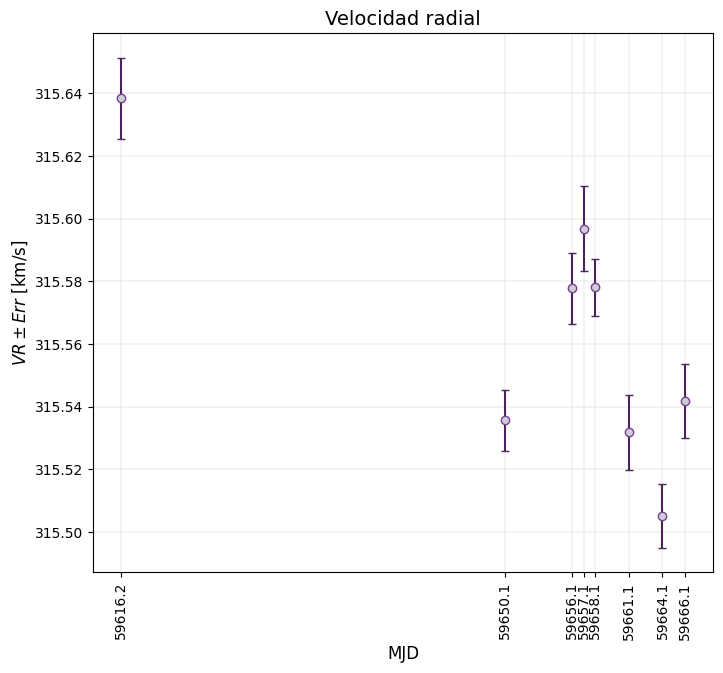

In [40]:
plt.figure(figsize=(8,7))
x = [-22,12,18,19,20,23,26,28]
plt.errorbar(x, RV,  yerr = RV_E, linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',mec='#7D3C98', ms=6, mew=1)
plt.xlabel('MJD',fontsize = 12)
plt.ylabel('$VR \pm Err $ [km/s]' ,fontsize = 12)
plt.title('Velocidad radial',fontsize = 14)
#plt.ylim(398.5,399.8)
plt.xticks(x,  np.around(Fecha_Juliana,1), rotation=90)
plt.grid(linestyle='-', linewidth=0.2)
plt.show() 

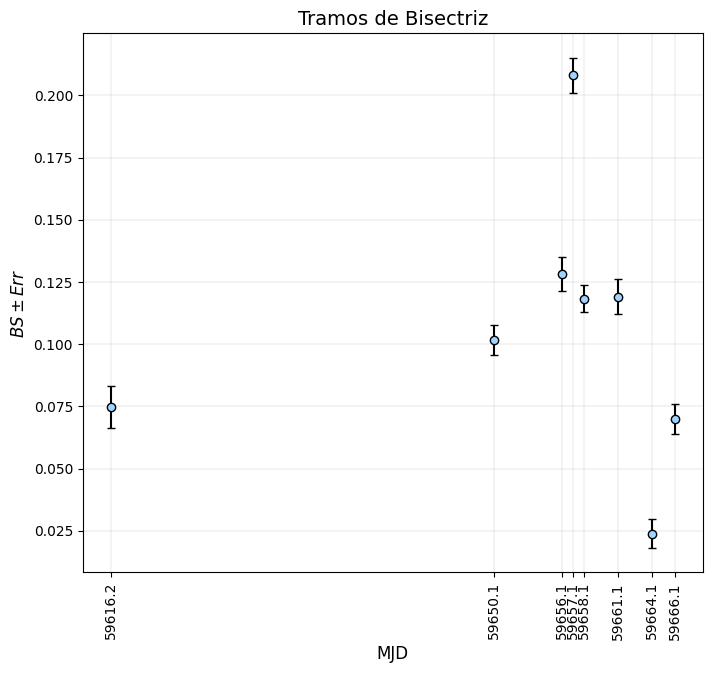

In [41]:
plt.figure(figsize=(8,7))
x = [-22,12,18,19,20,23,26,28]
plt.errorbar(x, BS,  yerr = BS_E, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#a2d2ff',mec='k', ms=6, mew=1)
plt.xlabel('MJD',fontsize = 12)
plt.ylabel('$BS \pm Err $ ' ,fontsize = 12)
plt.title('Tramos de Bisectriz',fontsize = 14)
#plt.ylim(398.5,399.8)
plt.xticks(x,  np.around(Fecha_Juliana,1), rotation=90)
plt.grid(linestyle='-', linewidth=0.2)
plt.show() 

In [43]:
SNR_R

[63.0, 102.0, 82.0, 80.0, 114.0, 80.0, 106.0, 97.0]

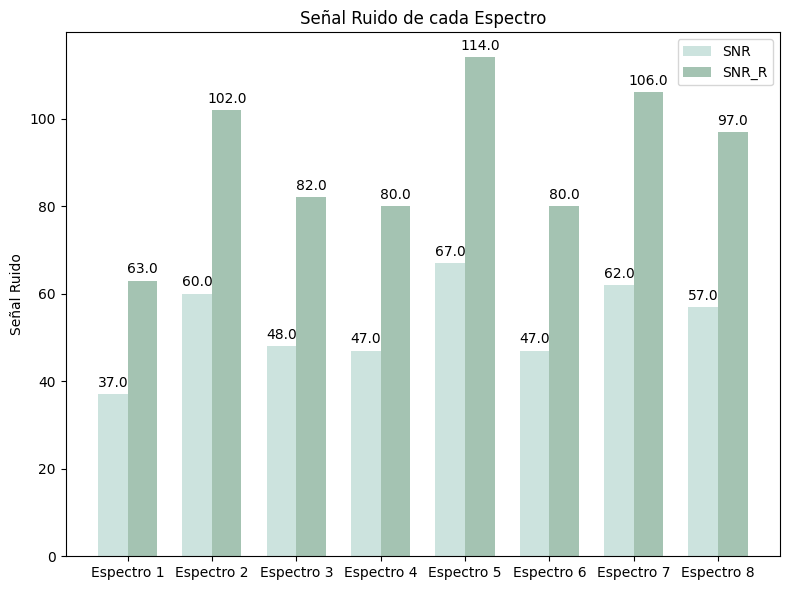

In [42]:
asistencia = ['Espectro 1', 'Espectro 2', 'Espectro 3', 'Espectro 4', 'Espectro 5', 'Espectro 6','Espectro 7','Espectro 8']

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(asistencia))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, SNR, width, label='SNR', color = '#cce3de')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, SNR_R, width, label='SNR_R', color = '#a4c3b2')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Señal Ruido')
ax.set_title('Señal Ruido de cada Espectro')
ax.set_xticks(x)
ax.set_xticklabels(asistencia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#Mostramos la grafica con el metodo show()
plt.show()

https://github.com/rabrahm/ceres/blob/master/README.md

0-  Wavelength

1-  Extracted Flux

2-  Measurement of the error in the extracted flux [1./sqrt(Var)]

3-  Blaze corrected Flux

4-  Measurement of the error in the blaze corrected flux

5-  Continuum normalized flux

6-  Measurement of the error in the continuum normalized flux

7-  Estimated continuum

8-  Signal-to-noise ratio

9-  Continumm normalized flux multiplied by the derivative of the wavelength with respect to the pixels

10- Corresponding error of the 9th entrance

In [22]:
tabla1 = srich1[0].data

In [23]:
tabla1 = srich1[0].data
Tabla = pd.DataFrame(tabla1[0])
Tabla

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,6973.919714,6973.993174,6974.066628,6974.140075,6974.213515,6974.286949,6974.360377,6974.433797,6974.507212,6974.580619,...,7106.139005,7106.193832,7106.248649,7106.303454,7106.358248,7106.413032,7106.467805,7106.522567,7106.577318,7106.632058
1,6859.569015,6859.641298,6859.713575,6859.785845,6859.858109,6859.930366,6860.002617,6860.074862,6860.147100,6860.219331,...,6989.666089,6989.720030,6989.773960,6989.827880,6989.881789,6989.935687,6989.989575,6990.043452,6990.097318,6990.151174
2,6748.908362,6748.979498,6749.050628,6749.121752,6749.192869,6749.263980,6749.335085,6749.406183,6749.477275,6749.548361,...,6876.948364,6877.001443,6877.054511,6877.107569,6877.160616,6877.213653,6877.266679,6877.319695,6877.372700,6877.425694
3,6641.762207,6641.832228,6641.902242,6641.972251,6642.042253,6642.112249,6642.182239,6642.252223,6642.322200,6642.392172,...,6767.807967,6767.860209,6767.912440,6767.964661,6768.016872,6768.069072,6768.121262,6768.173441,6768.225610,6768.277769
4,6537.965702,6538.034639,6538.103571,6538.172496,6538.241415,6538.310329,6538.379236,6538.448137,6538.517032,6538.585921,...,6662.077662,6662.129092,6662.180512,6662.231921,6662.283321,6662.334710,6662.386089,6662.437457,6662.488816,6662.540164
5,6437.364044,6437.431930,6437.499810,6437.567684,6437.635553,6437.703415,6437.771271,6437.839122,6437.906966,6437.974805,...,6559.600228,6559.650872,6559.701505,6559.752129,6559.802742,6559.853345,6559.903938,6559.954521,6560.005094,6560.055657
6,6339.811807,6339.878673,6339.945533,6340.012388,6340.079236,6340.146079,6340.212915,6340.279746,6340.346571,6340.413391,...,6460.227828,6460.277710,6460.327582,6460.377444,6460.427296,6460.477137,6460.526969,6460.576791,6460.626603,6460.676405
7,6245.172287,6245.238164,6245.304034,6245.369898,6245.435757,6245.501611,6245.567458,6245.633300,6245.699136,6245.764966,...,6363.821382,6363.870526,6363.919660,6363.968784,6364.017898,6364.067002,6364.116097,6364.165181,6364.214256,6364.263321
8,6153.316879,6153.381795,6153.446704,6153.511609,6153.576507,6153.641400,6153.706287,6153.771169,6153.836045,6153.900916,...,6270.249967,6270.298395,6270.346813,6270.395222,6270.443621,6270.492010,6270.540390,6270.588759,6270.637119,6270.685470
9,6064.124491,6064.188474,6064.252451,6064.316423,6064.380389,6064.444350,6064.508305,6064.572254,6064.636199,6064.700137,...,6179.390242,6179.437976,6179.485700,6179.533415,6179.581120,6179.628816,6179.676502,6179.724178,6179.771845,6179.819502


In [24]:
Wavelength = pd.DataFrame(tabla1[0])
Flux = pd.DataFrame(tabla1[5])
Error = pd.DataFrame(1/tabla1[6])
F = []
λ = []
Err = []

for j in range(38,-1,-1):
    for i in range(2048):
        λ.append(Wavelength[i][j])
        F.append(Flux[i][j])
        Err.append(Error[i][j])
    
Datos = λ,F,Err

In [25]:
Wavelength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Columns: 2048 entries, 0 to 2047
dtypes: float64(2048)
memory usage: 624.1 KB


In [26]:
λ[0],F[0],Err[0]

(4269.7890400246115, 2.493233111815854, 0.20547368734538318)

In [27]:
Tabla1 = pd.DataFrame()
Tabla1['Wavelength'] = λ
Tabla1['Norm Flux'] = F
Tabla1['Err Norm Flux'] = Err

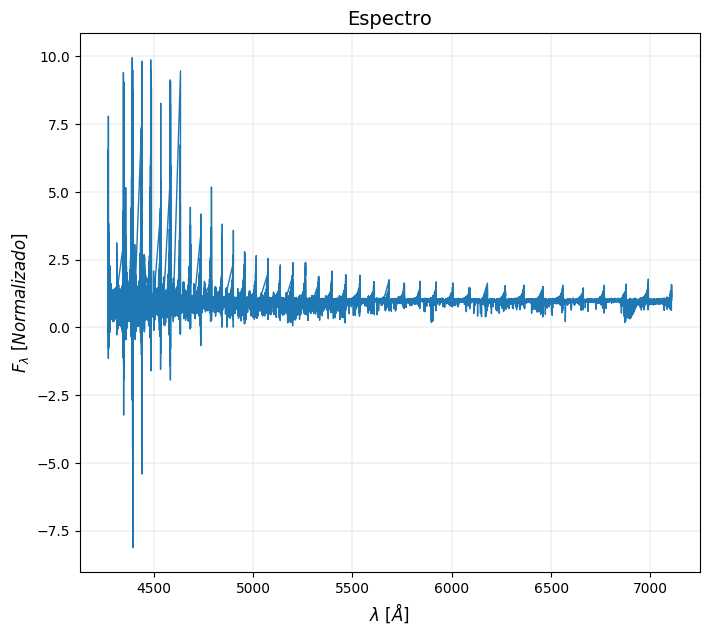

In [28]:
plt.figure(figsize=(8,7))
plt.plot(Tabla1['Wavelength'],Tabla1['Norm Flux'], '-',linewidth = 1)

plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
#plt.xlim(4000,4450)
plt.grid(linestyle='-', linewidth=0.2)

**Nota:** En esta figura no estamos teniendo en cuenta la superposición que hay de los datos de cada fila, por esta razón el espectro se ve de esta manera porque Python lo que hace al ver que se debe devolver para completar la línea continua es graficar líneas que unen esos puntos, pero que no tienen ningún sentido.

In [29]:
beging = 38

FGeneral = [[] for _ in range(beging+1)]
λGeneral = [[] for _ in range(beging+1)]
ErrGeneral = [[] for _ in range(beging+1)]


for i in tqdm(range(2048)):
    for j in range(beging):
        FGeneral[j].append(Flux[i][beging-j])
        λGeneral[j].append(Wavelength[i][beging-j])
        ErrGeneral[j].append(1/(Error[i][beging-j]))

    FGeneral[38].append(Flux[i][0])
    λGeneral[38].append(Wavelength[i][0])
    ErrGeneral[38].append(1/(Error[i][0]))

100%|█████████████████████████████████████| 2048/2048 [00:01<00:00, 1348.45it/s]


100%|██████████████████████████████████████████| 39/39 [00:00<00:00, 443.07it/s]


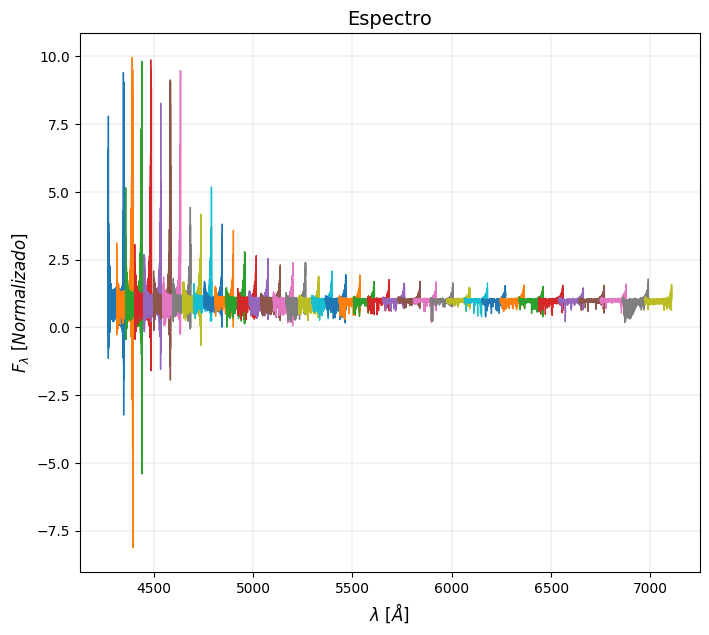

In [30]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 39)]
plt.figure(figsize=(8,7))

for k in tqdm(range(39)):
    plt.plot(λGeneral[k],FGeneral[k], '-',linewidth = 1) #color = colors[beging-k])
    
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

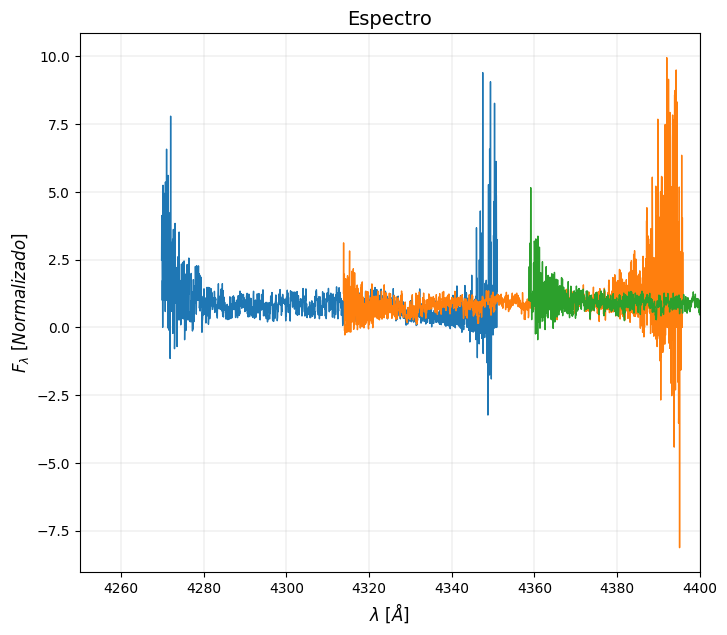

In [31]:
%matplotlib inline
plt.figure(figsize=(8,7))
plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 1) #color = colors[beging-k])
plt.plot(λGeneral[1],FGeneral[1], '-',linewidth = 1) #color = colors[beging-k])
plt.plot(λGeneral[2],FGeneral[2], '-',linewidth = 1) #color = colors[beging-k])
plt.plot(λGeneral[3],FGeneral[3], '-',linewidth = 1) #color = colors[beging-k])
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.xlim(4250,4400)
#plt.ylim(0,1.5)
plt.grid(linestyle='-', linewidth=0.2)

In [32]:
λInter0 = []
for i in λGeneral[0]:
    if (i >= λGeneral[1][0]):
        λInter0.append(i)
Mean0 = np.mean(λInter0)


λNuevo = []
FNuevo = []
for i,j in zip(λGeneral[0],FGeneral[0]):
    if (i <= Mean0):
        λNuevo.append(i)
        FNuevo.append(j)
            
for i,j in zip(λGeneral[1],FGeneral[1]):
    if (i >= Mean0):
        λNuevo.append(i)
        FNuevo.append(j)

##########

λInter1 = []
for i in λGeneral[1]:
    if (i >= λGeneral[2][0]):
        λInter1.append(i)
Mean1 = np.mean(λInter1)

λNuevo1 = []
FNuevo1 = []
for i,j in zip(λNuevo,FNuevo):
    if (i <= Mean1):
        λNuevo1.append(i)
        FNuevo1.append(j)
            
for i,j in zip(λGeneral[2],FGeneral[2]):
    if (i >= Mean1):
        λNuevo1.append(i)
        FNuevo1.append(j)
        
##########

λInter2 = []
for i in λGeneral[2]:
    if (i >= λGeneral[3][0]):
        λInter2.append(i)
Mean2 = np.mean(λInter2)

λNuevo2 = []
FNuevo2 = []
for i,j in zip(λNuevo1,FNuevo1):
    if (i <= Mean2):
        λNuevo2.append(i)
        FNuevo2.append(j)
            
for i,j in zip(λGeneral[3],FGeneral[3]):
    if (i >= Mean2):
        λNuevo2.append(i)
        FNuevo2.append(j)
        
##########

λInter3 = []
for i in λGeneral[3]:
    if (i >= λGeneral[4][0]):
        λInter3.append(i)
Mean3 = np.mean(λInter3)

λNuevo3 = []
FNuevo3 = []
for i,j in zip(λNuevo2,FNuevo2):
    if (i <= Mean3):
        λNuevo3.append(i)
        FNuevo3.append(j)
            
for i,j in zip(λGeneral[4],FGeneral[4]):
    if (i >= Mean3):
        λNuevo3.append(i)
        FNuevo3.append(j)
        
        
##########

λInter4 = []
for i in λGeneral[4]:
    if (i >= λGeneral[5][0]):
        λInter4.append(i)
Mean4 = np.mean(λInter4)

λNuevo4 = []
FNuevo4 = []
for i,j in zip(λNuevo3,FNuevo3):
    if (i <= Mean4):
        λNuevo4.append(i)
        FNuevo4.append(j)
            
for i,j in zip(λGeneral[5],FGeneral[5]):
    if (i >= Mean4):
        λNuevo4.append(i)
        FNuevo4.append(j)

                
##########

λInter5 = []
for i in λGeneral[5]:
    if (i >= λGeneral[6][0]):
        λInter5.append(i)
Mean5 = np.mean(λInter5)

λNuevo5 = []
FNuevo5 = []
for i,j in zip(λNuevo4,FNuevo4):
    if (i <= Mean5):
        λNuevo5.append(i)
        FNuevo5.append(j)
            
for i,j in zip(λGeneral[6],FGeneral[6]):
    if (i >= Mean5):
        λNuevo5.append(i)
        FNuevo5.append(j)

        
        ##########

λInter6 = []
for i in λGeneral[6]:
    if (i >= λGeneral[7][0]):
        λInter6.append(i)
Mean6 = np.mean(λInter6)

λNuevo6 = []
FNuevo6 = []
for i,j in zip(λNuevo5,FNuevo5):
    if (i <= Mean6):
        λNuevo6.append(i)
        FNuevo6.append(j)
            
for i,j in zip(λGeneral[7],FGeneral[7]):
    if (i >= Mean6):
        λNuevo6.append(i)
        FNuevo6.append(j)
        
        ##########

λInter7 = []
for i in λGeneral[7]:
    if (i >= λGeneral[8][0]):
        λInter7.append(i)
Mean7 = np.mean(λInter7)

λNuevo7 = []
FNuevo7 = []
for i,j in zip(λNuevo6,FNuevo6):
    if (i <= Mean7):
        λNuevo7.append(i)
        FNuevo7.append(j)
            
for i,j in zip(λGeneral[8],FGeneral[8]):
    if (i >= Mean7):
        λNuevo7.append(i)
        FNuevo7.append(j)

                ##########

λInter8 = []
for i in λGeneral[8]:
    if (i >= λGeneral[9][0]):
        λInter8.append(i)
Mean8 = np.mean(λInter8)

λNuevo8 = []
FNuevo8 = []
for i,j in zip(λNuevo7,FNuevo7):
    if (i <= Mean8):
        λNuevo8.append(i)
        FNuevo8.append(j)
            
for i,j in zip(λGeneral[9],FGeneral[9]):
    if (i >= Mean8):
        λNuevo8.append(i)
        FNuevo8.append(j)
        
                ##########

λInter9 = []
for i in λGeneral[9]:
    if (i >= λGeneral[10][0]):
        λInter9.append(i)
Mean9 = np.mean(λInter9)

λNuevo9 = []
FNuevo9 = []
for i,j in zip(λNuevo8,FNuevo8):
    if (i <= Mean9):
        λNuevo9.append(i)
        FNuevo9.append(j)
            
for i,j in zip(λGeneral[10],FGeneral[10]):
    if (i >= Mean9):
        λNuevo9.append(i)
        FNuevo9.append(j)
        
                ##########

λInter10 = []
for i in λGeneral[10]:
    if (i >= λGeneral[11][0]):
        λInter10.append(i)
Mean10 = np.mean(λInter10)

λNuevo10 = []
FNuevo10 = []
for i,j in zip(λNuevo9,FNuevo9):
    if (i <= Mean10):
        λNuevo10.append(i)
        FNuevo10.append(j)
            
for i,j in zip(λGeneral[11],FGeneral[11]):
    if (i >= Mean10):
        λNuevo10.append(i)
        FNuevo10.append(j)
        
                ##########

λInter11 = []
for i in λGeneral[11]:
    if (i >= λGeneral[12][0]):
        λInter11.append(i)
Mean11 = np.mean(λInter11)

λNuevo11 = []
FNuevo11 = []
for i,j in zip(λNuevo10,FNuevo10):
    if (i <= Mean11):
        λNuevo11.append(i)
        FNuevo11.append(j)
            
for i,j in zip(λGeneral[12],FGeneral[12]):
    if (i >= Mean11):
        λNuevo11.append(i)
        FNuevo11.append(j)
        
                ##########

λInter12 = []
for i in λGeneral[12]:
    if (i >= λGeneral[13][0]):
        λInter12.append(i)
Mean12 = np.mean(λInter12)

λNuevo12 = []
FNuevo12 = []
for i,j in zip(λNuevo11,FNuevo11):
    if (i <= Mean12):
        λNuevo12.append(i)
        FNuevo12.append(j)
            
for i,j in zip(λGeneral[13],FGeneral[13]):
    if (i >= Mean12):
        λNuevo12.append(i)
        FNuevo12.append(j)

                ##########

λInter13 = []
for i in λGeneral[13]:
    if (i >= λGeneral[14][0]):
        λInter13.append(i)
Mean13 = np.mean(λInter13)

λNuevo13 = []
FNuevo13 = []
for i,j in zip(λNuevo12,FNuevo12):
    if (i <= Mean13):
        λNuevo13.append(i)
        FNuevo13.append(j)
            
for i,j in zip(λGeneral[14],FGeneral[14]):
    if (i >= Mean13):
        λNuevo13.append(i)
        FNuevo13.append(j)

                ##########

λInter14 = []
for i in λGeneral[14]:
    if (i >= λGeneral[15][0]):
        λInter14.append(i)
Mean14 = np.mean(λInter14)

λNuevo14 = []
FNuevo14 = []
for i,j in zip(λNuevo13,FNuevo13):
    if (i <= Mean14):
        λNuevo14.append(i)
        FNuevo14.append(j)
            
for i,j in zip(λGeneral[15],FGeneral[15]):
    if (i >= Mean14):
        λNuevo14.append(i)
        FNuevo14.append(j)
        
                ##########

λInter15 = []
for i in λGeneral[15]:
    if (i >= λGeneral[16][0]):
        λInter15.append(i)
Mean15 = np.mean(λInter15)

λNuevo15 = []
FNuevo15 = []
for i,j in zip(λNuevo14,FNuevo14):
    if (i <= Mean15):
        λNuevo15.append(i)
        FNuevo15.append(j)
            
for i,j in zip(λGeneral[16],FGeneral[16]):
    if (i >= Mean15):
        λNuevo15.append(i)
        FNuevo15.append(j)
        
                ##########

λInter16 = []
for i in λGeneral[16]:
    if (i >= λGeneral[17][0]):
        λInter16.append(i)
Mean16 = np.mean(λInter16)

λNuevo16 = []
FNuevo16 = []
for i,j in zip(λNuevo15,FNuevo15):
    if (i <= Mean16):
        λNuevo16.append(i)
        FNuevo16.append(j)
            
for i,j in zip(λGeneral[17],FGeneral[17]):
    if (i >= Mean16):
        λNuevo16.append(i)
        FNuevo16.append(j)
        
                ##########

λInter17 = []
for i in λGeneral[17]:
    if (i >= λGeneral[18][0]):
        λInter17.append(i)
Mean17 = np.mean(λInter17)

λNuevo17 = []
FNuevo17 = []
for i,j in zip(λNuevo16,FNuevo16):
    if (i <= Mean17):
        λNuevo17.append(i)
        FNuevo17.append(j)
            
for i,j in zip(λGeneral[18],FGeneral[18]):
    if (i >= Mean17):
        λNuevo17.append(i)
        FNuevo17.append(j)
        
                ##########

λInter18 = []
for i in λGeneral[18]:
    if (i >= λGeneral[19][0]):
        λInter18.append(i)
Mean18 = np.mean(λInter18)

λNuevo18 = []
FNuevo18 = []
for i,j in zip(λNuevo17,FNuevo17):
    if (i <= Mean18):
        λNuevo18.append(i)
        FNuevo18.append(j)
            
for i,j in zip(λGeneral[19],FGeneral[19]):
    if (i >= Mean18):
        λNuevo18.append(i)
        FNuevo18.append(j)
    
                ##########

λInter19 = []
for i in λGeneral[19]:
    if (i >= λGeneral[20][0]):
        λInter19.append(i)
Mean19 = np.mean(λInter19)

λNuevo19 = []
FNuevo19 = []
for i,j in zip(λNuevo18,FNuevo18):
    if (i <= Mean19):
        λNuevo19.append(i)
        FNuevo19.append(j)
            
for i,j in zip(λGeneral[20],FGeneral[20]):
    if (i >= Mean19):
        λNuevo19.append(i)
        FNuevo19.append(j)
        
                ##########

λInter20 = []
for i in λGeneral[20]:
    if (i >= λGeneral[21][0]):
        λInter20.append(i)
Mean20 = np.mean(λInter20)

λNuevo20 = []
FNuevo20 = []
for i,j in zip(λNuevo19,FNuevo19):
    if (i <= Mean20):
        λNuevo20.append(i)
        FNuevo20.append(j)
            
for i,j in zip(λGeneral[21],FGeneral[21]):
    if (i >= Mean20):
        λNuevo20.append(i)
        FNuevo20.append(j)
    
                ##########

λInter21 = []
for i in λGeneral[21]:
    if (i >= λGeneral[22][0]):
        λInter21.append(i)
Mean21 = np.mean(λInter21)

λNuevo21 = []
FNuevo21 = []
for i,j in zip(λNuevo20,FNuevo20):
    if (i <= Mean21):
        λNuevo21.append(i)
        FNuevo21.append(j)
            
for i,j in zip(λGeneral[22],FGeneral[22]):
    if (i >= Mean21):
        λNuevo21.append(i)
        FNuevo21.append(j)
        
                ##########

λInter22 = []
for i in λGeneral[22]:
    if (i >= λGeneral[23][0]):
        λInter22.append(i)
Mean22 = np.mean(λInter22)

λNuevo22 = []
FNuevo22 = []
for i,j in zip(λNuevo21,FNuevo21):
    if (i <= Mean22):
        λNuevo22.append(i)
        FNuevo22.append(j)
            
for i,j in zip(λGeneral[23],FGeneral[23]):
    if (i >= Mean22):
        λNuevo22.append(i)
        FNuevo22.append(j)
    
                ##########

λInter23 = []
for i in λGeneral[23]:
    if (i >= λGeneral[24][0]):
        λInter23.append(i)
Mean23 = np.mean(λInter23)

λNuevo23 = []
FNuevo23 = []
for i,j in zip(λNuevo22,FNuevo22):
    if (i <= Mean23):
        λNuevo23.append(i)
        FNuevo23.append(j)
            
for i,j in zip(λGeneral[24],FGeneral[24]):
    if (i >= Mean23):
        λNuevo23.append(i)
        FNuevo23.append(j)
        
                ##########

λInter24 = []
for i in λGeneral[24]:
    if (i >= λGeneral[25][0]):
        λInter24.append(i)
Mean24 = np.mean(λInter24)

λNuevo24 = []
FNuevo24 = []
for i,j in zip(λNuevo23,FNuevo23):
    if (i <= Mean24):
        λNuevo24.append(i)
        FNuevo24.append(j)
            
for i,j in zip(λGeneral[25],FGeneral[25]):
    if (i >= Mean24):
        λNuevo24.append(i)
        FNuevo24.append(j)
        
                ##########

λInter25 = []
for i in λGeneral[25]:
    if (i >= λGeneral[26][0]):
        λInter25.append(i)
Mean25 = np.mean(λInter25)

λNuevo25 = []
FNuevo25 = []
for i,j in zip(λNuevo24,FNuevo24):
    if (i <= Mean25):
        λNuevo25.append(i)
        FNuevo25.append(j)
            
for i,j in zip(λGeneral[26],FGeneral[26]):
    if (i >= Mean25):
        λNuevo25.append(i)
        FNuevo25.append(j)

                ##########

λInter26 = []
for i in λGeneral[26]:
    if (i >= λGeneral[27][0]):
        λInter26.append(i)
Mean26 = np.mean(λInter26)

λNuevo26 = []
FNuevo26 = []
for i,j in zip(λNuevo25,FNuevo25):
    if (i <= Mean26):
        λNuevo26.append(i)
        FNuevo26.append(j)
            
for i,j in zip(λGeneral[27],FGeneral[27]):
    if (i >= Mean26):
        λNuevo26.append(i)
        FNuevo26.append(j)

                ##########

λInter27 = []
for i in λGeneral[27]:
    if (i >= λGeneral[28][0]):
        λInter27.append(i)
Mean27 = np.mean(λInter27)

λNuevo27 = []
FNuevo27 = []
for i,j in zip(λNuevo26,FNuevo26):
    if (i <= Mean27):
        λNuevo27.append(i)
        FNuevo27.append(j)
            
for i,j in zip(λGeneral[28],FGeneral[28]):
    if (i >= Mean27):
        λNuevo27.append(i)
        FNuevo27.append(j)
    
                ##########

λInter28 = []
for i in λGeneral[28]:
    if (i >= λGeneral[29][0]):
        λInter28.append(i)
Mean28 = np.mean(λInter28)

λNuevo28 = []
FNuevo28 = []
for i,j in zip(λNuevo27,FNuevo27):
    if (i <= Mean28):
        λNuevo28.append(i)
        FNuevo28.append(j)
            
for i,j in zip(λGeneral[29],FGeneral[29]):
    if (i >= Mean28):
        λNuevo28.append(i)
        FNuevo28.append(j)

                ##########

λInter29 = []
for i in λGeneral[29]:
    if (i >= λGeneral[30][0]):
        λInter29.append(i)
Mean29 = np.mean(λInter29)

λNuevo29 = []
FNuevo29 = []
for i,j in zip(λNuevo28,FNuevo28):
    if (i <= Mean29):
        λNuevo29.append(i)
        FNuevo29.append(j)
            
for i,j in zip(λGeneral[30],FGeneral[30]):
    if (i >= Mean29):
        λNuevo29.append(i)
        FNuevo29.append(j)

                ##########

λInter30 = []
for i in λGeneral[30]:
    if (i >= λGeneral[31][0]):
        λInter30.append(i)
Mean30 = np.mean(λInter30)

λNuevo30 = []
FNuevo30 = []
for i,j in zip(λNuevo29,FNuevo29):
    if (i <= Mean30):
        λNuevo30.append(i)
        FNuevo30.append(j)
            
for i,j in zip(λGeneral[31],FGeneral[31]):
    if (i >= Mean30):
        λNuevo30.append(i)
        FNuevo30.append(j)
        
                ##########

λInter31 = []
for i in λGeneral[31]:
    if (i >= λGeneral[32][0]):
        λInter31.append(i)
Mean31 = np.mean(λInter31)

λNuevo31 = []
FNuevo31 = []
for i,j in zip(λNuevo30,FNuevo30):
    if (i <= Mean31):
        λNuevo31.append(i)
        FNuevo31.append(j)
            
for i,j in zip(λGeneral[32],FGeneral[32]):
    if (i >= Mean31):
        λNuevo31.append(i)
        FNuevo31.append(j)
        
                ##########

λInter32 = []
for i in λGeneral[32]:
    if (i >= λGeneral[33][0]):
        λInter32.append(i)
Mean32 = np.mean(λInter32)

λNuevo32 = []
FNuevo32 = []
for i,j in zip(λNuevo31,FNuevo31):
    if (i <= Mean32):
        λNuevo32.append(i)
        FNuevo32.append(j)
            
for i,j in zip(λGeneral[33],FGeneral[33]):
    if (i >= Mean32):
        λNuevo32.append(i)
        FNuevo32.append(j)
        
                ##########

λInter33 = []
for i in λGeneral[33]:
    if (i >= λGeneral[34][0]):
        λInter33.append(i)
Mean33 = np.mean(λInter33)

λNuevo33 = []
FNuevo33 = []
for i,j in zip(λNuevo32,FNuevo32):
    if (i <= Mean33):
        λNuevo33.append(i)
        FNuevo33.append(j)
            
for i,j in zip(λGeneral[34],FGeneral[34]):
    if (i >= Mean33):
        λNuevo33.append(i)
        FNuevo33.append(j)
        
                ##########

λInter34 = []
for i in λGeneral[34]:
    if (i >= λGeneral[35][0]):
        λInter34.append(i)
Mean34 = np.mean(λInter34)

λNuevo34 = []
FNuevo34 = []
for i,j in zip(λNuevo33,FNuevo33):
    if (i <= Mean34):
        λNuevo34.append(i)
        FNuevo34.append(j)
            
for i,j in zip(λGeneral[35],FGeneral[35]):
    if (i >= Mean34):
        λNuevo34.append(i)
        FNuevo34.append(j)
    
                ##########

λInter35 = []
for i in λGeneral[35]:
    if (i >= λGeneral[36][0]):
        λInter35.append(i)
Mean35 = np.mean(λInter35)

λNuevo35 = []
FNuevo35 = []
for i,j in zip(λNuevo34,FNuevo34):
    if (i <= Mean35):
        λNuevo35.append(i)
        FNuevo35.append(j)
            
for i,j in zip(λGeneral[36],FGeneral[36]):
    if (i >= Mean35):
        λNuevo35.append(i)
        FNuevo35.append(j)
        
                ##########

λInter36 = []
for i in λGeneral[36]:
    if (i >= λGeneral[37][0]):
        λInter36.append(i)
Mean36 = np.mean(λInter36)

λNuevo36 = []
FNuevo36 = []
for i,j in zip(λNuevo35,FNuevo35):
    if (i <= Mean36):
        λNuevo36.append(i)
        FNuevo36.append(j)
            
for i,j in zip(λGeneral[37],FGeneral[37]):
    if (i >= Mean36):
        λNuevo36.append(i)
        FNuevo36.append(j)

                ##########

                ##########

λInter37 = []
for i in λGeneral[37]:
    if (i >= λGeneral[38][0]):
        λInter37.append(i)
Mean37 = np.mean(λInter37)

λNuevo37 = []
FNuevo37 = []
for i,j in zip(λNuevo36,FNuevo36):
    if (i <= Mean37):
        λNuevo37.append(i)
        FNuevo37.append(j)
            
for i,j in zip(λGeneral[38],FGeneral[38]):
    if (i >= Mean37):
        λNuevo37.append(i)
        FNuevo37.append(j)

                ##########
            

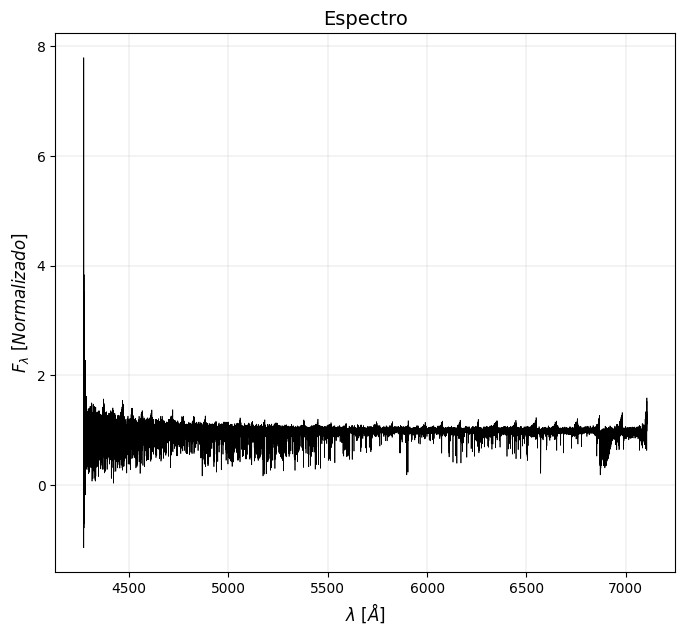

In [33]:
%matplotlib inline
plt.figure(figsize=(8,7))
plt.plot(λNuevo37,FNuevo37, '-',linewidth = 0.5, color='k') #color = colors[beging-k])
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

In [34]:
TablaIspec_prueba = pd.DataFrame()
TablaIspec_prueba['waveobs'] = λNuevo37
TablaIspec_prueba['flux'] = FNuevo37
#TablaIspec['err'] = ErrNuevos[-1]
TablaIspec_prueba['err'] = [0]*len(FNuevo37)
TablaIspec_prueba

,waveobs,flux,err
0,4269.789040,2.493233,0
1,4269.833876,3.970698,0
2,4269.878708,4.129501,0
3,4269.923536,2.577596,0
4,4269.968360,1.000000,0
...,...,...,...
54770,7106.413032,1.027360,0
54771,7106.467805,1.000000,0
54772,7106.522567,1.000000,0
54773,7106.577318,1.090609,0


In [35]:
TablaIspec_prueba.to_csv('Espectro_prueba1.txt', sep=" ", quoting=csv.QUOTE_NONE, escapechar=" ", index = False)

In [34]:
beging

38

In [42]:
λInter0 = []
for i in λGeneral[0]:
    if (i >= λGeneral[1][0]):
        λInter0.append(i)
Mean0 = np.mean(λInter0)

λNuevo = []
FNuevo = []
ErrNuevo = []

for i,j,k in zip(λGeneral[0],FGeneral[0], ErrGeneral[0]):
    if (i <= Mean0):
        λNuevo.append(i)
        FNuevo.append(j)
        ErrNuevo.append(k)
        
λInter = [[] for _ in range(beging)]
FNuevos = [[] for _ in range(beging)]
λNuevos = [[] for _ in range(beging)]
ErrNuevos = [[] for _ in range(beging)]
Means = [[] for _ in range(beging)]


for j in tqdm(range(beging)):
    λInter[j] = []
    for i in λGeneral[j]:
        if (i >= λGeneral[j+1][0]):
            λInter[j].append(i)
    Means[j] = np.mean(λInter[j])

    λNuevos[j] = []
    FNuevos[j] = []
    ErrNuevos[j] = []
    for k,l,m in zip(λNuevos[j-1],FNuevos[j-1],ErrNuevos[j-1]):
        if (k <= Means[j]):
            λNuevos[j].append(k)
            FNuevos[j].append(l)
            ErrNuevos[j].append(m)
            
    for k,l,m in zip(λGeneral[j+1],FGeneral[j+1],ErrGeneral[j+1]):
        if (k >= Means[j]):
            λNuevos[j].append(k)
            FNuevos[j].append(l)
            ErrNuevos[j].append(m)

λTodos =   λNuevos[-1] # +λNuevo 
FTodos =   FNuevos[-1] # +FNuevo
ErrTodos =   ErrNuevos[-1] # +ErrNuevo

100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 66.05it/s]


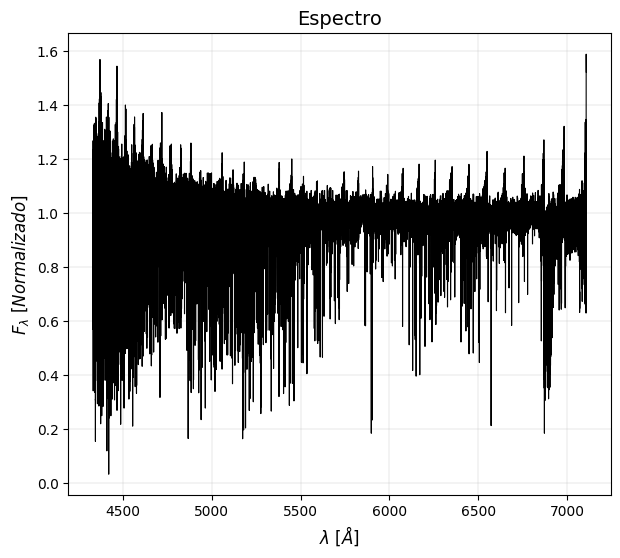

In [43]:
plt.figure(figsize=(7,6))
plt.plot(λTodos,FTodos, '-',linewidth = 0.8,color='k') #color = colors[beging-k])
#plt.plot(λNuevos[-1],FNuevos[-1], '-',linewidth = 0.8,color='k') #color = colors[beging-k])
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
#plt.ylim(-1,4)
#plt.xlim(4285,4400)
#plt.xlim(5290,5295)
plt.grid(linestyle='-', linewidth=0.2)

In [44]:
#λNuevos[-1],FNuevos[-1],ErrNuevos[-1]

In [45]:
TablaIspec = pd.DataFrame()
TablaIspec['waveobs'] = λTodos
TablaIspec['flux'] = FTodos
TablaIspec['err'] = 1/np.array(ErrTodos)
#TablaIspec['err'] = [0]*len(FNuevos[-1])
TablaIspec

,waveobs,flux,err
0,4332.970626,0.792309,0.002092
1,4333.014079,1.102409,0.002071
2,4333.057528,0.881437,0.001876
3,4333.100971,0.865511,0.001947
4,4333.144410,0.732717,0.001770
...,...,...,...
53235,7106.413032,1.027360,0.005116
53236,7106.467805,1.000000,0.006042
53237,7106.522567,1.000000,0.007036
53238,7106.577318,1.090609,0.004800


In [46]:

TablaIspec.to_csv('Err_0_Espectro_HD55496.txt', sep=" ", quoting=csv.QUOTE_NONE, escapechar=" ", index = False)


In [65]:
def Extraccion_Espectros(x, nombre):
    print(x)
    %matplotlib inline
    srich = fits.open(x) #open file
    tabla = srich[0].data
    Wavelength = pd.DataFrame(tabla[0])
    Flux = pd.DataFrame(tabla[5])
    Error = pd.DataFrame(1/tabla[6])
    
    F = []
    λ = []
    Err = []

    for j in tqdm(range(38,-1,-1)):
        for i in range(2048):
            λ.append(Wavelength[i][j])
            F.append(Flux[i][j])
            Err.append(Error[i][j])
            
    Tabla = pd.DataFrame()
    Tabla['Wavelength'] = λ
    Tabla['Norm Flux'] = F
    Tabla['Err Norm Flux'] = Err

    beging = 38

    FGeneral = [[] for _ in range(beging+1)]
    λGeneral = [[] for _ in range(beging+1)]
    ErrGeneral = [[] for _ in range(beging+1)]
    
    
    for i in tqdm(range(2048)):
        for j in range(beging):
            FGeneral[j].append(Flux[i][beging-j])
            λGeneral[j].append(Wavelength[i][beging-j])
            ErrGeneral[j].append(Error[i][beging-j])
    
        FGeneral[38].append(Flux[i][0])
        λGeneral[38].append(Wavelength[i][0])
        ErrGeneral[38].append(Error[i][0])
    
    
    # Graficando el espectro original
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, 39)]
    plt.figure(figsize=(8,7))

    for k in tqdm(range(39)):
        plt.plot(λGeneral[k],FGeneral[k], '-',linewidth = 1) #color = colors[beging-k])

    plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
    plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
    plt.title(nombre,fontsize = 14)
    plt.grid(linestyle='-', linewidth=0.2)
    
    
    # Filtrando el espectro por medio del valor medio entre cada fila de frecuencias

 ####

    λInter0 = []
    for i in λGeneral[0]:
        if (i >= λGeneral[1][0]):
            λInter0.append(i)
    Mean0 = np.mean(λInter0)

    λNuevo = []
    FNuevo = []
    ErrNuevo = []
    
    for i,j,k in zip(λGeneral[0],FGeneral[0], ErrGeneral[0]):
        if (i <= Mean0):
            λNuevo.append(i)
            FNuevo.append(j)
            ErrNuevo.append(k)
            
    λInter = [[] for _ in range(beging)]
    FNuevos = [[] for _ in range(beging)]
    λNuevos = [[] for _ in range(beging)]
    ErrNuevos = [[] for _ in range(beging)]
    Means = [[] for _ in range(beging)]
    
    
    for j in tqdm(range(beging)):
        λInter[j] = []
        for i in λGeneral[j]:
            if (i >= λGeneral[j+1][0]):
                λInter[j].append(i)
        Means[j] = np.mean(λInter[j])
    
        λNuevos[j] = []
        FNuevos[j] = []
        ErrNuevos[j] = []
        
        for k,l,m in zip(λNuevos[j-1],FNuevos[j-1],ErrNuevos[j-1]):
            if (k <= Means[j]):
                λNuevos[j].append(k)
                FNuevos[j].append(l)
                ErrNuevos[j].append(m)
                
        for k,l,m in zip(λGeneral[j+1],FGeneral[j+1],ErrGeneral[j+1]):
            if (k >= Means[j]):
                λNuevos[j].append(k)
                FNuevos[j].append(l)
                ErrNuevos[j].append(m)

    λTodos =  λNuevos[-1] #λNuevo +
    FTodos =  FNuevos[-1] #FNuevo +
    ErrTodos =  ErrNuevos[-1] #ErrNuevo +
###
                
    FnGeneral = [[] for _ in range(beging-1)]
    λnGeneral = [[] for _ in range(beging-1)]

    for j in range(beging-1):
        for i in λGeneral[j+1]:
            if (i >= λGeneral[j][-1]):
                λnGeneral[j].append(i)
        FnGeneral[j] = FGeneral[j+1][len(λGeneral[j+1])-len(λnGeneral[j]):]
        
    plt.figure(figsize=(8,7))
    plt.plot(λTodos,FTodos, '-',linewidth = 0.8,color='k') #color = colors[beging-k])
    plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
    plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
    plt.title(nombre,fontsize = 14)
    #plt.ylim(-1,7)
    #plt.xlim(6540,6580)
    #plt.xlim(5290,5295)

    #Línea de Hα
    #plt.xlim(6540,6580)
    #plt.ylim(-0.05,2.5)

    plt.grid(linestyle='-', linewidth=0.2)
    
    TablaIspec = pd.DataFrame()
    TablaIspec['waveobs'] = λTodos
    TablaIspec['flux'] = FTodos
    
    # Para el cálculo del error, como el valor de la tabla [6], pero 1/tabla[6]
    TablaIspec['err'] = ErrTodos
    print(TablaIspec)

    globals()["Lon_"+nombre] =  λTodos
    globals()["Flu_"+nombre] =  FTodos
    
    flux = FTodos*u.Jy
    wavelength = λTodos*u.AA
    Err = StdDevUncertainty(ErrTodos)
    
    spec1d = Spectrum1D(spectral_axis=wavelength, flux=flux, uncertainty = Err)
    spec1d.write(nombre+".fits", overwrite=True)  
    
    TablaIspec.to_csv(nombre+".txt", sep=" ", quoting=csv.QUOTE_NONE, escapechar=" ", index = False)
    


Espectro 1D: https://specutils.readthedocs.io/en/stable/spectrum1d.html

2022-02-06T05_23_26.977430-s-rich.sp.fits


100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 107.93it/s]


           waveobs      flux       err
0      4333.117867  1.127821  0.001339
1      4333.161322  1.123416  0.001373
2      4333.204772  0.584512  0.001040
3      4333.248218  0.549692  0.001024
4      4333.291658  0.306246  0.000780
...            ...       ...       ...
53232  7106.653696  0.492919  0.003661
53233  7106.708453  1.362482  0.004700
53234  7106.763199  1.184373  0.005171
53235  7106.817935  0.461383  0.003312
53236  7106.872659  1.146563  0.004383

[53237 rows x 3 columns]


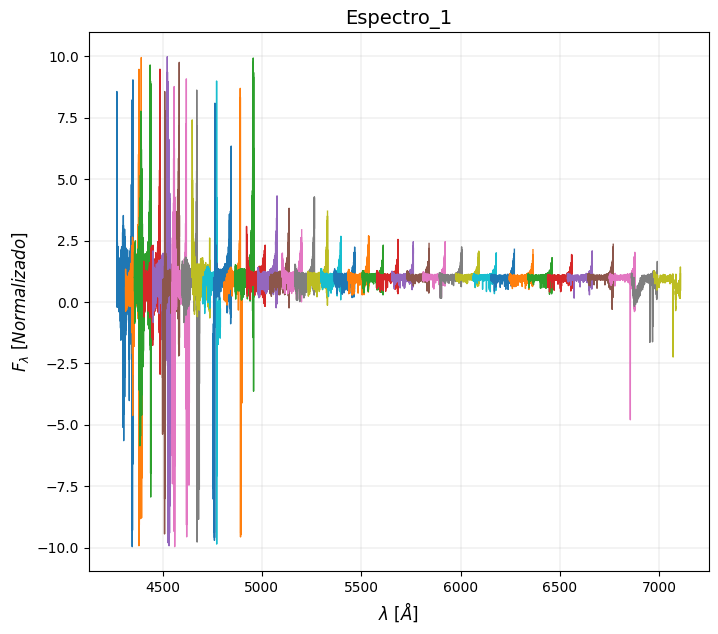

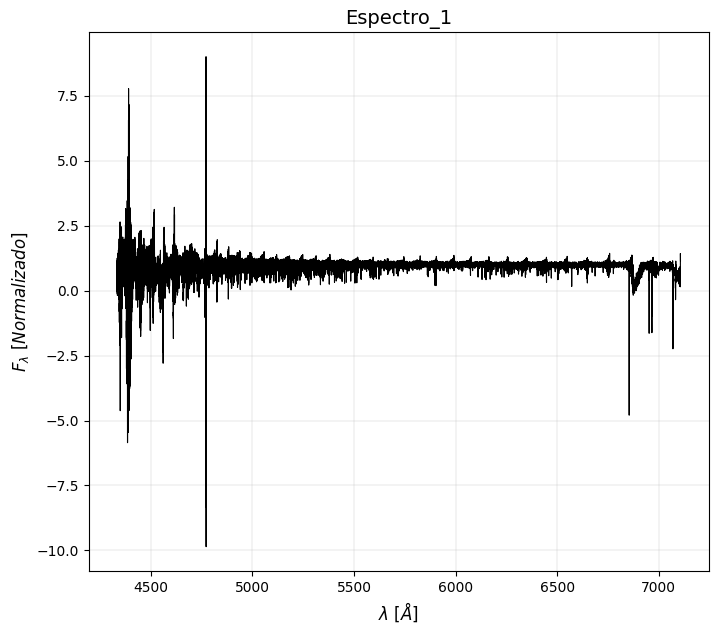

In [66]:
Extraccion_Espectros(Espectros[0], nombre = 'Espectro_1')

In [67]:
# ax = plt.subplots()[1]  
# ax.plot(spec1d.spectral_axis, spec1d.flux)  
# ax.set_xlabel("Dispersion")  
# ax.set_ylabel("Flux")  

In [68]:
Espectro_prueba = fits.open('Espectro_2.fits') #open file
imagen = Espectro_prueba[0]

In [69]:
Espectro_prueba.info()

Filename: Espectro_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     17   53237R x 3C   [D, D, D]   


In [70]:
from astropy.io import fits as pyfits
import numpy as np
import scipy as sc
import sys

images2=pyfits.open('Espectro_2.fits')

str(images2[1].data[0][1]) # Air 




'0.9194535949507187'

2022-03-12T02_16_56.574455-s-rich.sp.fits


100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 104.60it/s]


           waveobs      flux       err
0      4332.984284  0.919454  0.002106
1      4333.027737  1.033408  0.002179
2      4333.071185  0.886914  0.002007
3      4333.114629  0.783347  0.001919
4      4333.158068  0.722017  0.001823
...            ...       ...       ...
53232  7106.447992  1.006568  0.007218
53233  7106.502816  1.000000  0.009225
53234  7106.557629  1.000000  0.010128
53235  7106.612432  1.189315  0.007264
53236  7106.667224  1.704018  0.008379

[53237 rows x 3 columns]


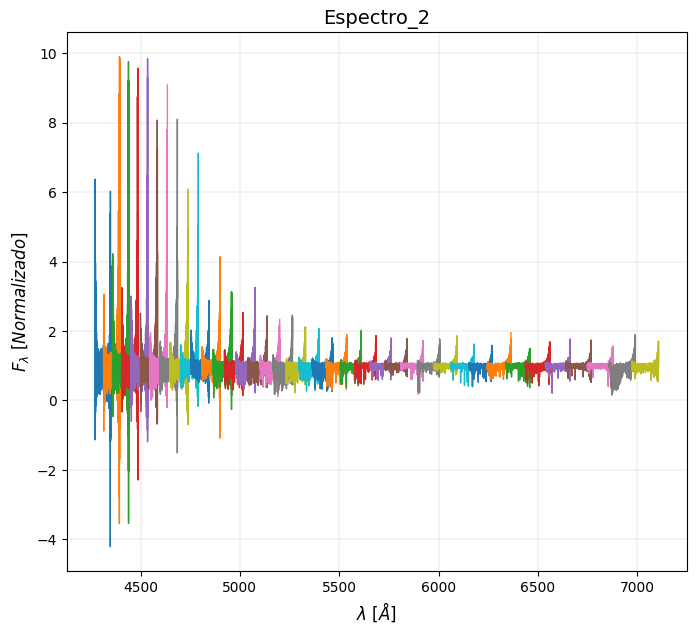

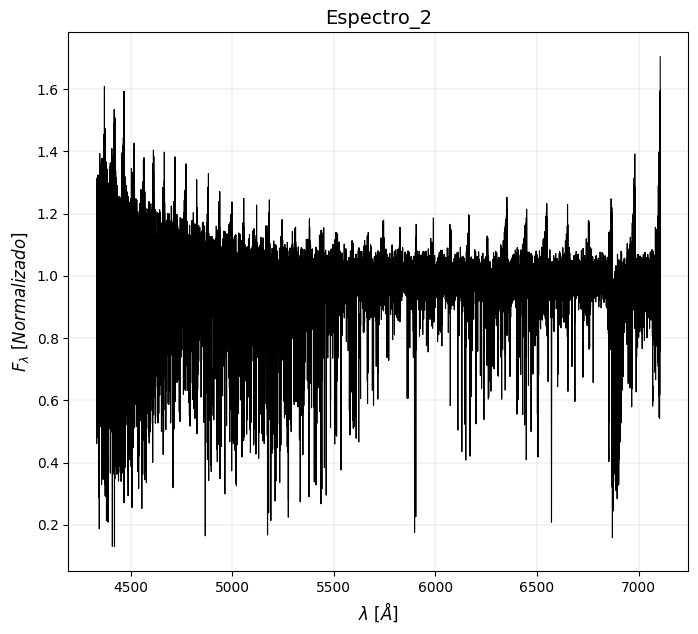

In [54]:
Extraccion_Espectros(Espectros[1], nombre = 'Espectro_2')

2022-03-18T01_02_08.612956-s-rich.sp.fits


100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 103.57it/s]


           waveobs      flux       err
0      4332.975650  1.309974  0.004530
1      4333.019103  1.521316  0.004783
2      4333.062551  1.044474  0.003982
3      4333.105994  0.948521  0.003846
4      4333.149433  0.719222  0.003574
...            ...       ...       ...
53234  7106.421780  1.427770  0.016711
53235  7106.476551  1.000000  0.020656
53236  7106.531311  1.000000  0.021494
53237  7106.586061  1.629696  0.015960
53238  7106.640799  2.080668  0.017340

[53239 rows x 3 columns]


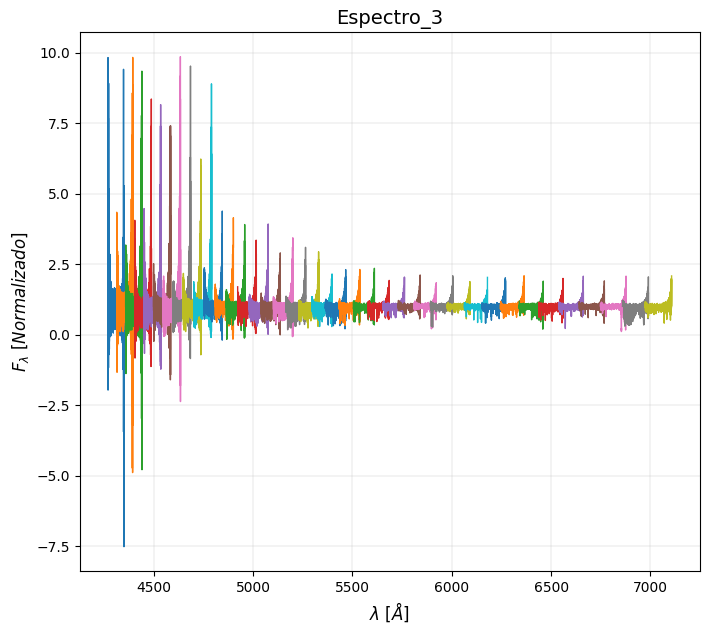

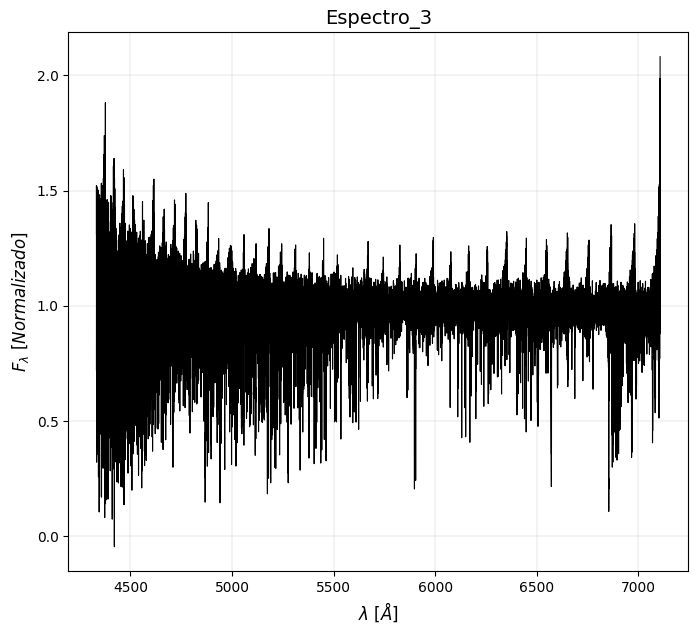

In [55]:
Extraccion_Espectros(Espectros[2], nombre = 'Espectro_3')

2022-03-19T02_43_12.713594-s-rich.sp.fits


100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 95.03it/s]


           waveobs      flux       err
0      4332.971890  0.573881  0.003136
1      4333.015344  1.012257  0.003139
2      4333.058792  0.608946  0.002586
3      4333.102236  0.763053  0.003131
4      4333.145676  0.490355  0.002617
...            ...       ...       ...
53234  7106.432345  1.129408  0.009491
53235  7106.487209  1.000000  0.011264
53236  7106.542062  1.000000  0.013116
53237  7106.596905  1.285696  0.009115
53238  7106.651737  1.583923  0.009889

[53239 rows x 3 columns]


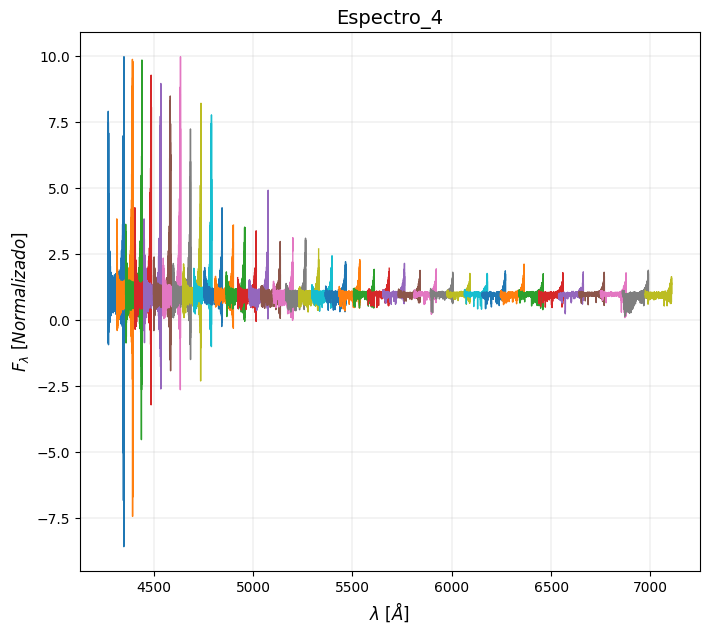

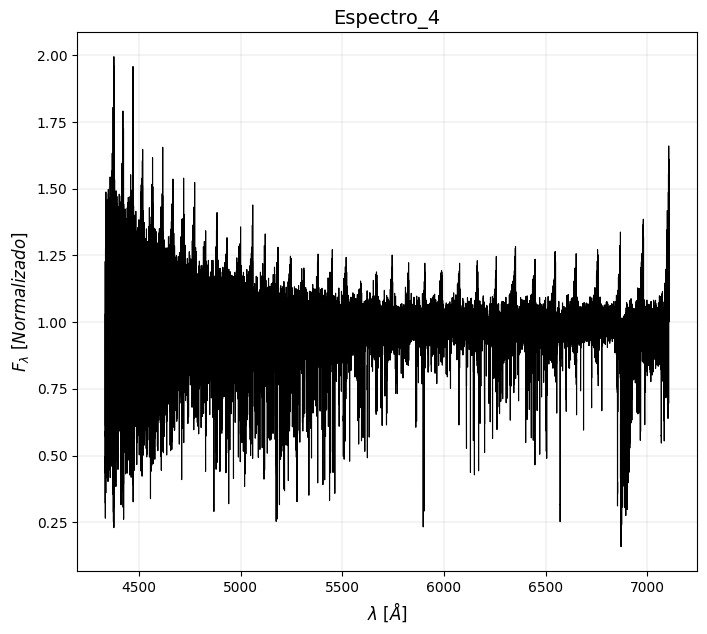

In [56]:
Extraccion_Espectros(Espectros[3], nombre = 'Espectro_4')

2022-03-20T01_13_27.761624-s-rich.sp.fits


100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 79.37it/s]


           waveobs      flux       err
0      4332.970626  0.792309  0.002092
1      4333.014079  1.102409  0.002071
2      4333.057528  0.881437  0.001876
3      4333.100971  0.865511  0.001947
4      4333.144410  0.732717  0.001770
...            ...       ...       ...
53235  7106.413032  1.027360  0.005116
53236  7106.467805  1.000000  0.006042
53237  7106.522567  1.000000  0.007036
53238  7106.577318  1.090609  0.004800
53239  7106.632058  1.522122  0.005642

[53240 rows x 3 columns]


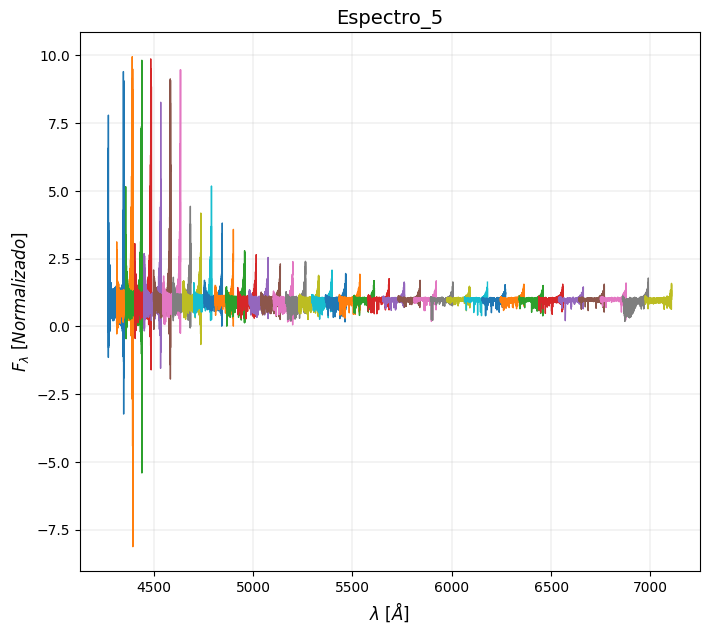

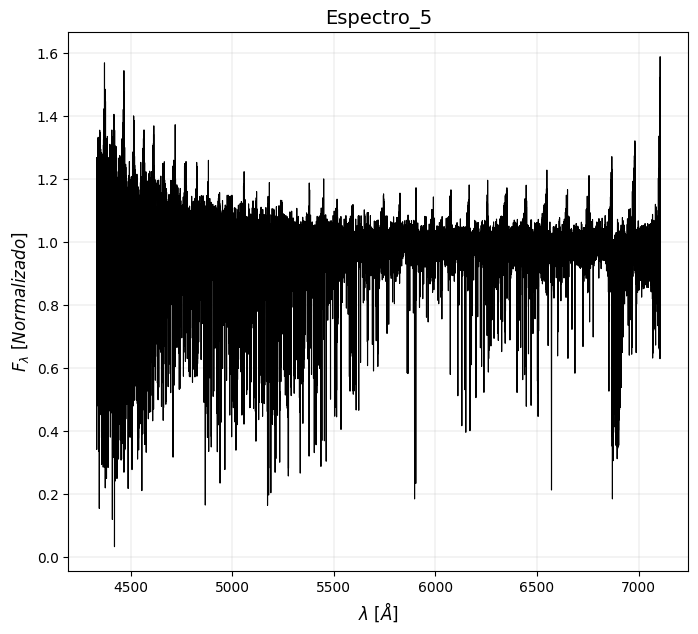

In [57]:
Extraccion_Espectros(Espectros[4], nombre = 'Espectro_5')

2022-03-23T02_14_17.433945-s-rich.sp.fits


100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 86.17it/s]


           waveobs      flux       err
0      4332.960691  0.610338  0.004271
1      4333.004144  1.321565  0.004762
2      4333.047592  0.958475  0.004391
3      4333.091036  0.919666  0.004485
4      4333.134474  0.714685  0.003810
...            ...       ...       ...
53234  7106.400633  1.258089  0.017065
53235  7106.455425  1.000000  0.021793
53236  7106.510205  1.000000  0.024807
53237  7106.564975  1.349042  0.016493
53238  7106.619734  1.832840  0.017730

[53239 rows x 3 columns]


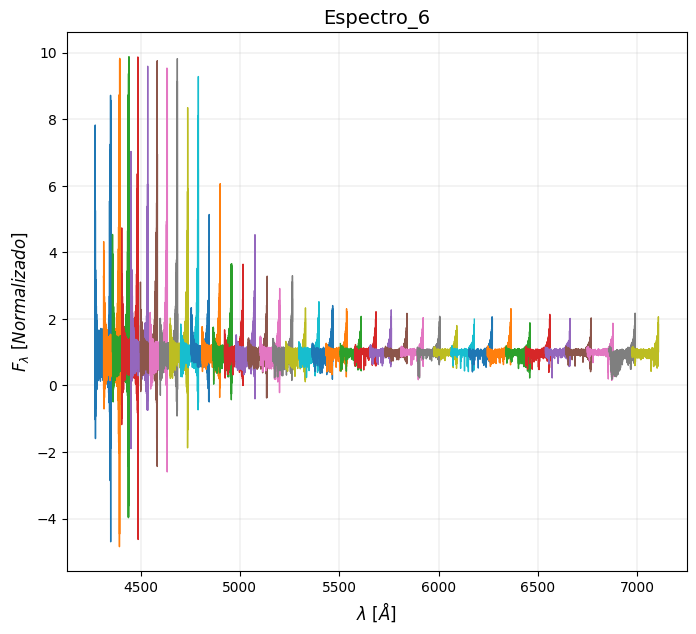

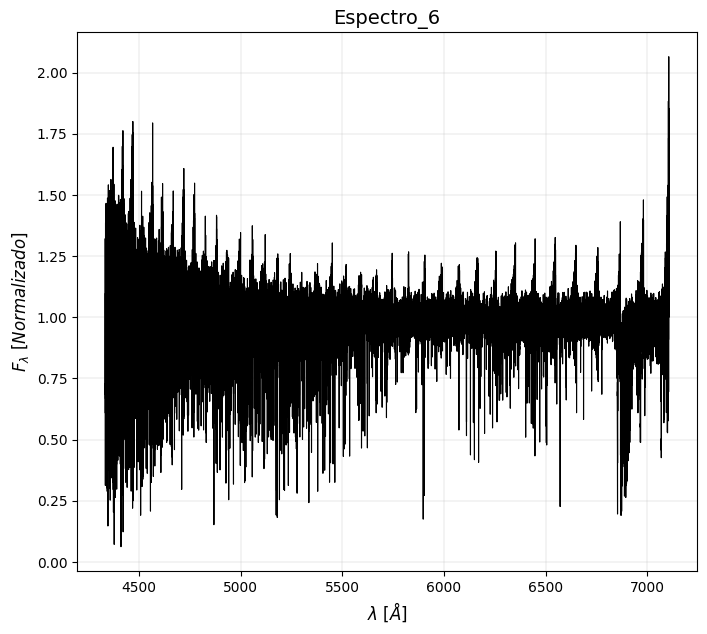

In [58]:
Extraccion_Espectros(Espectros[5], nombre = 'Espectro_6')

2022-03-26T02_41_37.929372-s-rich.sp.fits


100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 93.67it/s]


           waveobs      flux       err
0      4332.957088  0.706154  0.003779
1      4333.000541  1.174848  0.003962
2      4333.043989  1.099343  0.004022
3      4333.087432  0.890102  0.003517
4      4333.130870  0.716196  0.003519
...            ...       ...       ...
53234  7106.390933  1.001131  0.007389
53235  7106.445713  1.000000  0.008902
53236  7106.500482  1.000000  0.010546
53237  7106.555240  1.153659  0.007111
53238  7106.609988  1.448302  0.007975

[53239 rows x 3 columns]


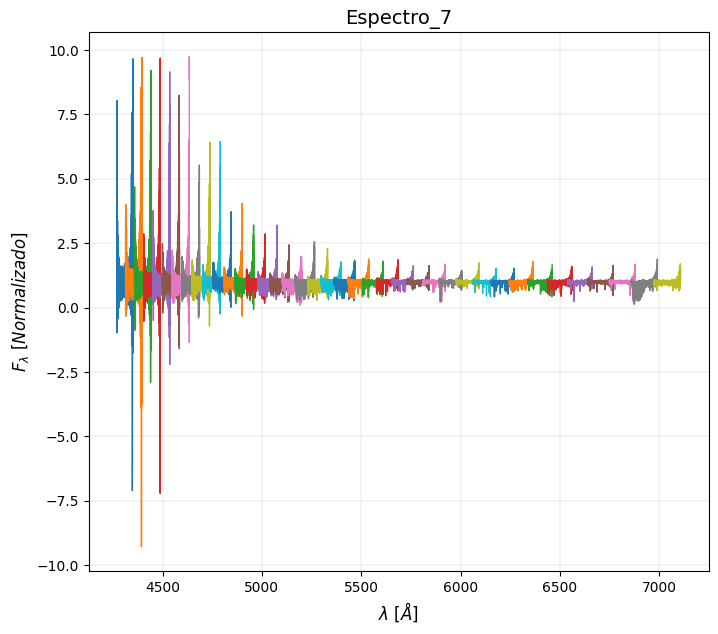

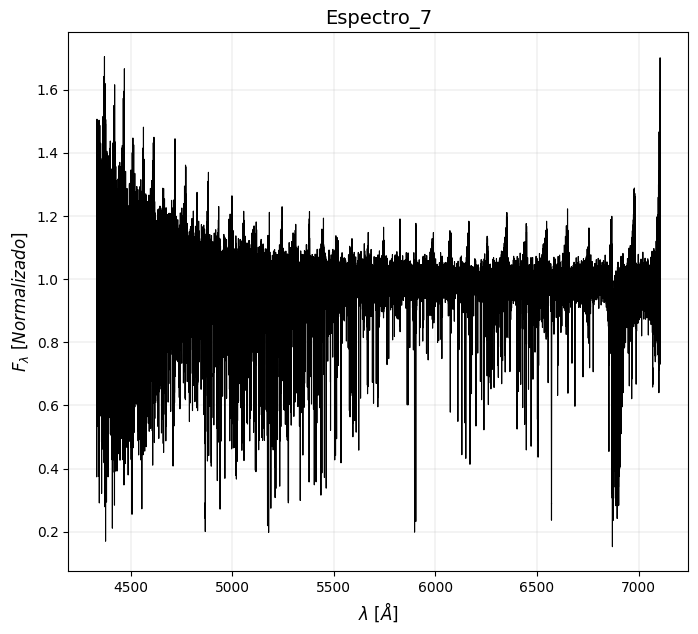

In [59]:
Extraccion_Espectros(Espectros[6], nombre = 'Espectro_7')

2022-03-28T02_37_18.141363-s-rich.sp.fits


100%|███████████████████████████████████████████| 38/38 [00:00<00:00, 84.06it/s]


           waveobs      flux       err
0      4332.953850  0.772243  0.004207
1      4332.997303  1.358490  0.004790
2      4333.040752  0.934908  0.004066
3      4333.084195  0.875247  0.004223
4      4333.127634  0.756906  0.003967
...            ...       ...       ...
53235  7106.381750  1.192490  0.006855
53236  7106.436513  1.000000  0.008196
53237  7106.491265  1.000000  0.009148
53238  7106.546006  1.163416  0.006146
53239  7106.600737  1.518757  0.007047

[53240 rows x 3 columns]


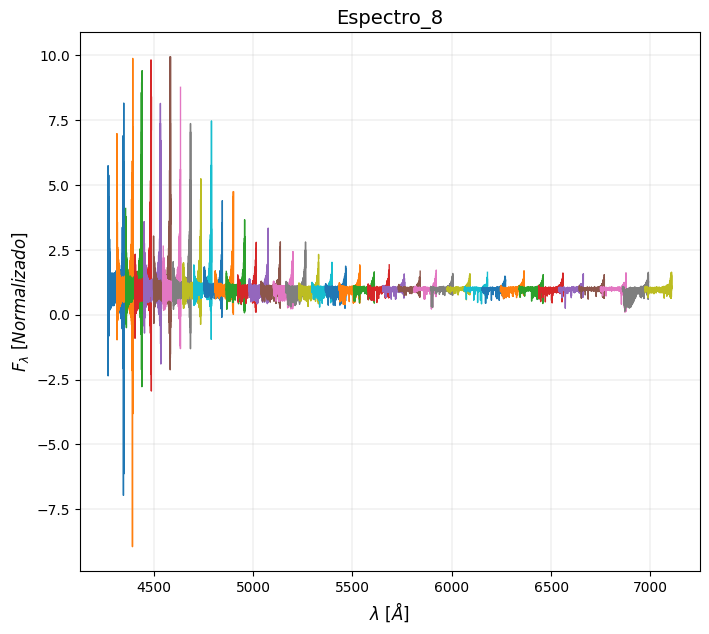

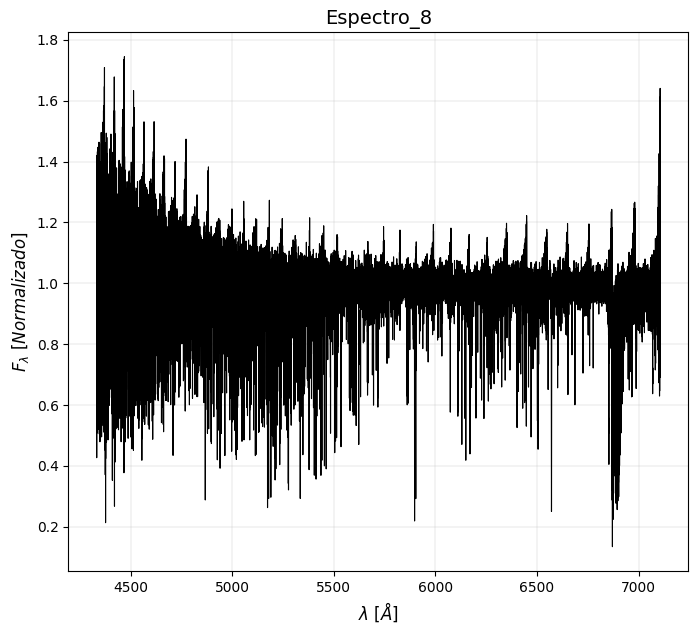

In [60]:
Extraccion_Espectros(Espectros[7], nombre = 'Espectro_8')

<function matplotlib.pyplot.show(close=None, block=None)>

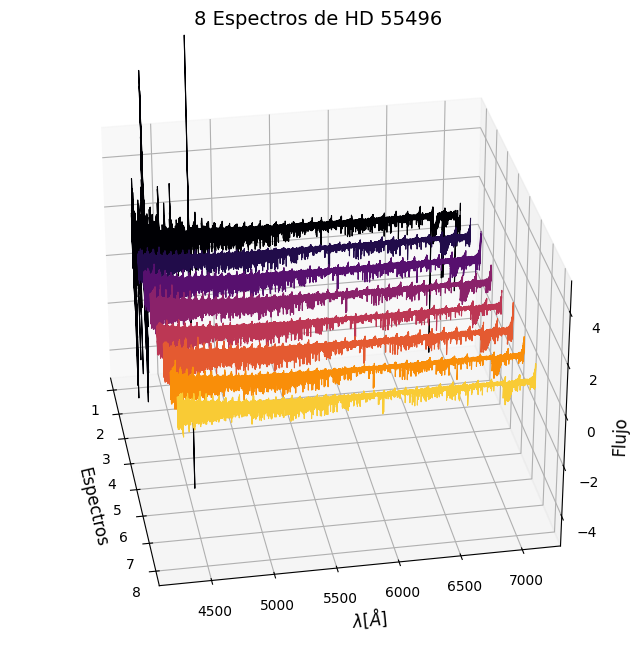

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Datos de ejemplo para longitud de onda y flujo para 8 paquetes de datos
paquetes_de_datos = 8
longitud_de_onda = [Lon_Espectro_1,Lon_Espectro_2,Lon_Espectro_3,Lon_Espectro_4,Lon_Espectro_5,Lon_Espectro_6,Lon_Espectro_7,Lon_Espectro_8]
flujo = [Flu_Espectro_1,Flu_Espectro_2,Flu_Espectro_3,Flu_Espectro_4,Flu_Espectro_5,Flu_Espectro_6,Flu_Espectro_7,Flu_Espectro_8]

# Crear la figura, y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('inferno')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

# Iterar sobre cada paquete de datos y graficar
for i in range(paquetes_de_datos):
    ax.plot3D(longitud_de_onda[i],flujo[i], zs=i+1, zdir='x', color=colors[i], linestyle='-',linewidth=0.8)

# Etiquetas y título
ax.view_init(elev=30, azim=-10)
ax.set_xlabel('Espectros', fontsize = 12)
ax.set_ylabel('$\lambda [Å]$',fontsize = 12)
ax.set_zlabel('Flujo',fontsize = 12)
ax.set_title('8 Espectros de HD 55496',fontsize = 14)
#ax.set_ylim(6550,6580)
#ax.set_zlim(0,1.75)
ax.set_zlim(-5,5)
# Mostrar el gráfico
ax.grid(linestyle='--', linewidth=0.1)
plt.show


In [55]:
np.sqrt(FNuevos[-1]), np.var(FNuevos[-1])

(array([0.78124129, 1.14959327, 0.97901712, ..., 1.35382412, 1.35382412,
        1.35382412]),
 0.016240064253790105)

In [56]:
# S2 = np.sum((FNuevos[-1]-np.mean(FNuevos[-1]))**2) / (len(FNuevos[-1])-1)
# S2

In [57]:
TablaVR = pd.DataFrame()
VR = [399.15,399.18,399.19,399.10,399.21,399.15,399.12,399.09]
Err_VR = [0.05,0.06,0.07,0.09,0.06,0.07,0.07,0.09]
Fecha = ["2022-02-06","2022-03-12","2022-03-18","2022-03-19","2022-03-20","2022-03-23","2022-03-26","2022-03-28"]

TablaVR['Fecha Espectro'] =  np.around(Fecha_Juliana,2)
TablaVR['VR'] = VR
TablaVR['VR Err'] = Err_VR

TablaVR

,Fecha Espectro,VR,VR Err
0,59616.23,399.15,0.05
1,59650.10,399.18,0.06
2,59656.05,399.19,0.07
3,59657.12,399.10,0.09
4,59658.06,399.21,0.06
5,59661.10,399.15,0.07
6,59664.12,399.12,0.07
7,59666.12,399.09,0.09


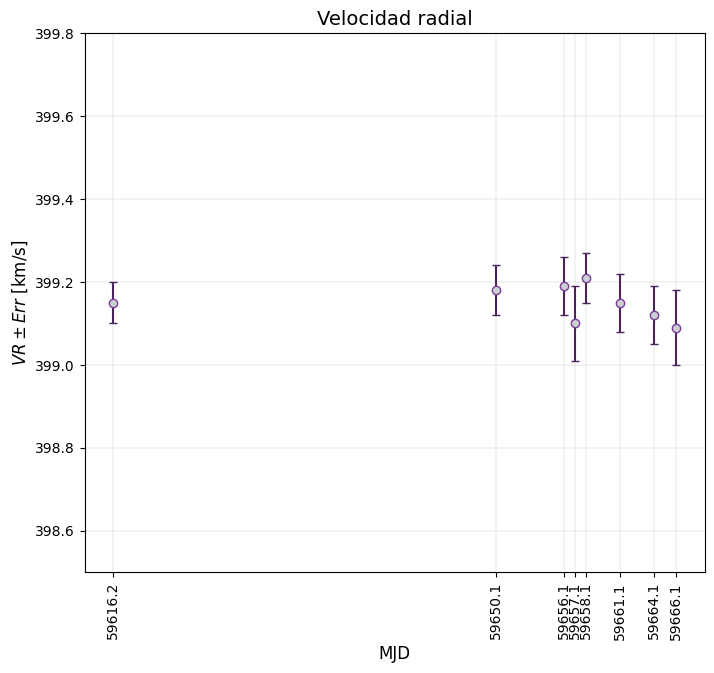

In [219]:
plt.figure(figsize=(8,7))
x = [-22,12,18,19,20,23,26,28]
VR = [399.15,399.18,399.19,399.10,399.21,399.15,399.12,399.09]

plt.errorbar(x, VR,  yerr = Err_VR, linestyle="None",  fmt="o",  capsize=3,  ecolor="#4A235A", mfc='#CACFD2',
         mec='#7D3C98', ms=6, mew=1)
plt.xlabel('MJD',fontsize = 12)
plt.ylabel('$VR \pm Err $ [km/s]' ,fontsize = 12)
plt.title('Velocidad radial',fontsize = 14)
plt.ylim(398.5,399.8)
plt.xticks(x,  np.around(Fecha_Juliana,1), rotation=90)
plt.grid(linestyle='-', linewidth=0.2)
plt.show() 


**Nota:** Aquí lo que vamos a hacer es unir las filas del espectro para formar el espectro completo, para esto tomamos los valores de la segunda fila en donde los valores de longitud de onda sean mayores al última valor de la fila anterior, así con cada una de estas.


In [220]:
FnGeneral = [[] for _ in range(beging-1)]
λnGeneral = [[] for _ in range(beging-1)]

for j in range(beging-1):
    for i in λGeneral[j+1]:
        if (i >= λGeneral[j][-1]):
            λnGeneral[j].append(i)
    FnGeneral[j] = FGeneral[j+1][len(λGeneral[j+1])-len(λnGeneral[j]):]

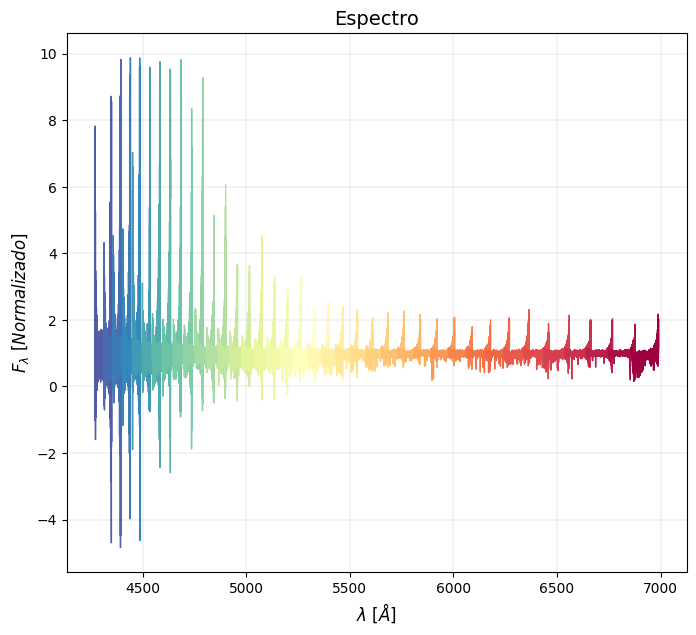

In [221]:
%matplotlib inline

# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 39)]

plt.figure(figsize=(8,7))
#plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 1, color = colors[-1])
beging = -2
for i in range(38):
    plt.plot(λGeneral[i],FGeneral[i], '-',linewidth = 1, color = colors[beging-i])

plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

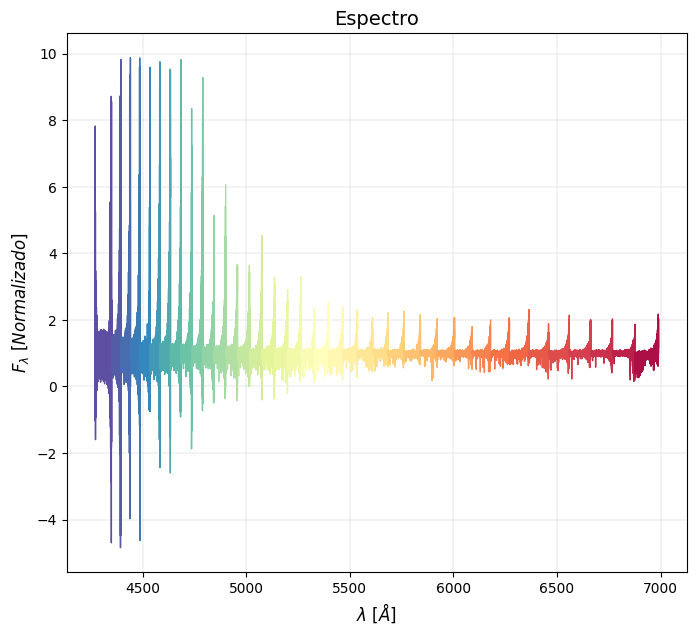

In [222]:
%matplotlib inline

# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 39)]

plt.figure(figsize=(8,7))
plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 1, color = colors[-1])
beging = -2
for i in range(37):
    plt.plot(λnGeneral[i],FnGeneral[i], '-',linewidth = 1, color = colors[beging-i])

plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

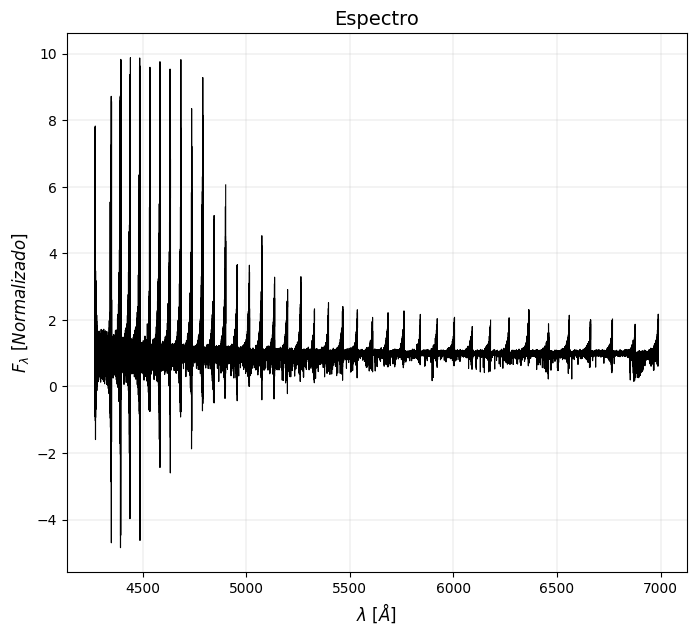

In [223]:
%matplotlib inline
#%matplotlib notebook

plt.figure(figsize=(8,7))
plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 0.8, color = 'k')
for i in range(37):
    plt.plot(λnGeneral[i],FnGeneral[i], '-',linewidth = 0.8, color = 'k')
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

In [224]:
Long = λGeneral[0] + λnGeneral[0]
Flujo = FGeneral[0] + FnGeneral[0]

for i in range(37):
    Long = Long + λnGeneral[i]
    Flujo = Flujo + FnGeneral[i]

TablaFinal = pd.DataFrame()
TablaFinal['Wavelength'] = Long
TablaFinal['Norm Flux'] = Flujo

In [225]:
len(Long),len(Flujo)

(56866, 56866)

In [226]:
TablaFinal

,Wavelength,Norm Flux
0,4269.777942,3.785481
1,4269.822786,3.446640
2,4269.867627,3.801684
3,4269.912463,1.530327
4,4269.957295,1.000000
...,...,...
56861,6989.922822,1.237281
56862,6989.976725,1.000000
56863,6990.030618,1.000000
56864,6990.084500,1.593211


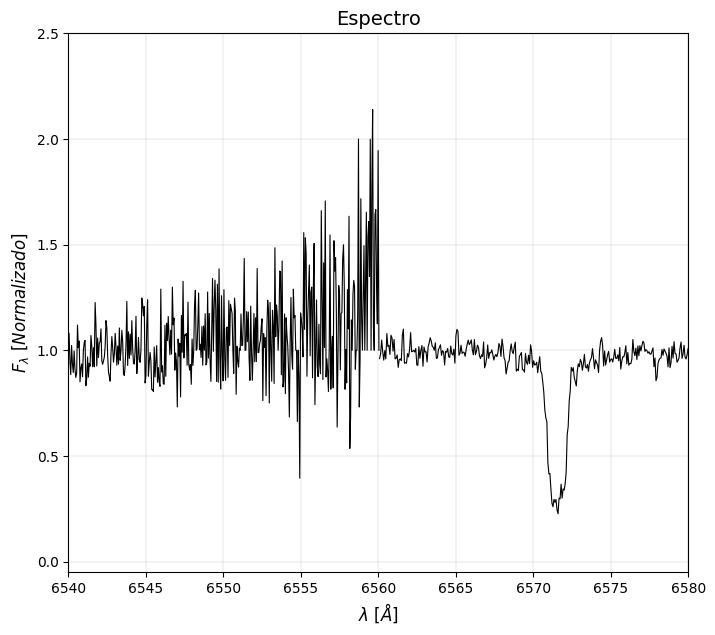

In [230]:
%matplotlib inline
#%matplotlib notebook

plt.figure(figsize=(8,7))
plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 0.8, color = 'k')
for i in range(37):
    plt.plot(λnGeneral[i],FnGeneral[i], '-',linewidth = 0.8, color = 'k')
plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
plt.title("Espectro",fontsize = 14)
#plt.xlim(5290,5295)
plt.xlim(6540,6580)
#plt.xlim(6160,6164)
#plt.xlim(7830,7838)
plt.ylim(-0.05,2.5)
plt.grid(linestyle='-', linewidth=0.2)

**También debo agregar el error a la tabla, para poder utilizar iSpec**

In [70]:
#def Espectros(x)

def Espectros(x):
    srich = fits.open(x) #open file
    tabla = srich[0].data

    Wavelength = pd.DataFrame(tabla[0])
    Flux = pd.DataFrame(tabla[5])

    beging = 38

    FGeneral = [[] for _ in range(beging)]
    λGeneral = [[] for _ in range(beging)]


    for i in range(2048):
        for j in range(beging):
            FGeneral[j].append(Flux[i][beging-j])
            λGeneral[j].append(Wavelength[i][beging-j])

    FnGeneral = [[] for _ in range(beging-1)]
    λnGeneral = [[] for _ in range(beging-1)]

    for j in range(beging-1):
        for i in λGeneral[j+1]:
            if (i >= λGeneral[j][-1]):
                λnGeneral[j].append(i)
        FnGeneral[j] = FGeneral[j+1][len(λGeneral[j+1])-len(λnGeneral[j]):]

    %matplotlib inline
    #%matplotlib notebook

    plt.figure(figsize=(8,7))
    plt.plot(λGeneral[0],FGeneral[0], '-',linewidth = 0.8, color = 'k')
    for i in range(37):
        plt.plot(λnGeneral[i],FnGeneral[i], '-',linewidth = 0.8, color = 'k')
    plt.xlabel('$\lambda~ [Å]$',fontsize = 12)
    plt.ylabel('$F_\lambda~  [Normalizado]$' ,fontsize = 12)
    plt.title("Espectro",fontsize = 14)
    plt.grid(linestyle='-', linewidth=0.2)

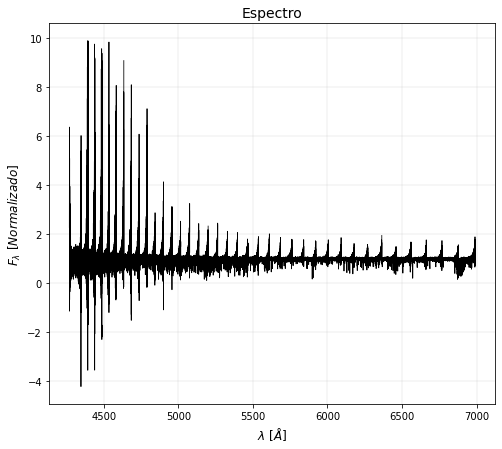

In [71]:
Espectros('2022-03-12T02_16_56.574455-s-rich.sp.fits')

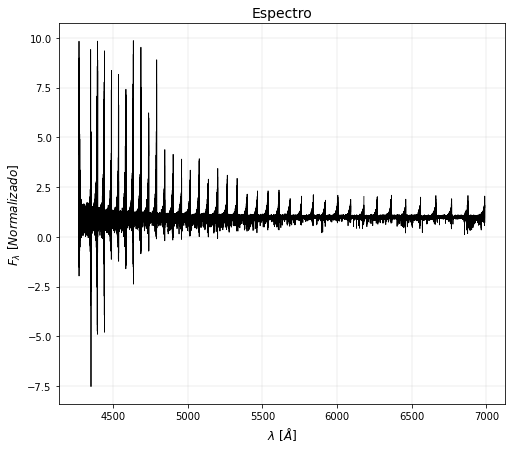

In [72]:
Espectros('2022-03-18T01_02_08.612956-s-rich.sp.fits')

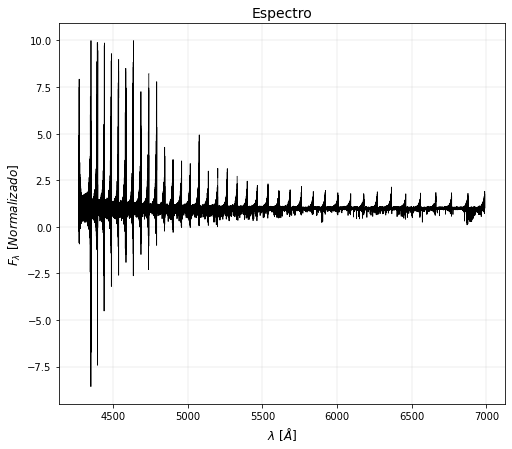

In [73]:
Espectros('2022-03-19T02_43_12.713594-s-rich.sp.fits')

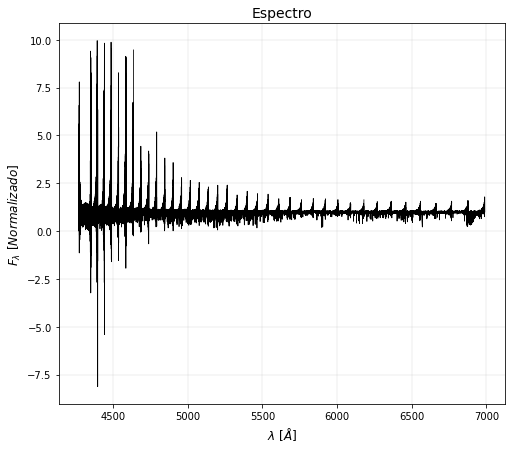

In [74]:
Espectros('2022-03-20T01_13_27.761624-s-rich.sp.fits')

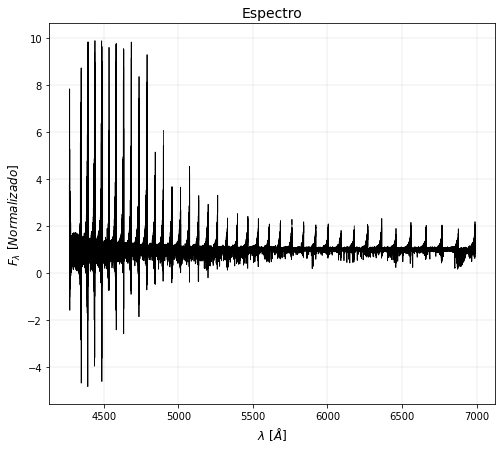

In [75]:
Espectros('2022-03-23T02_14_17.433945-s-rich.sp.fits')

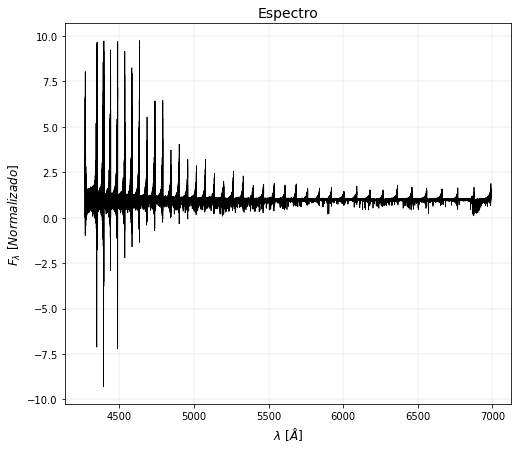

In [76]:
Espectros('2022-03-26T02_41_37.929372-s-rich.sp.fits')

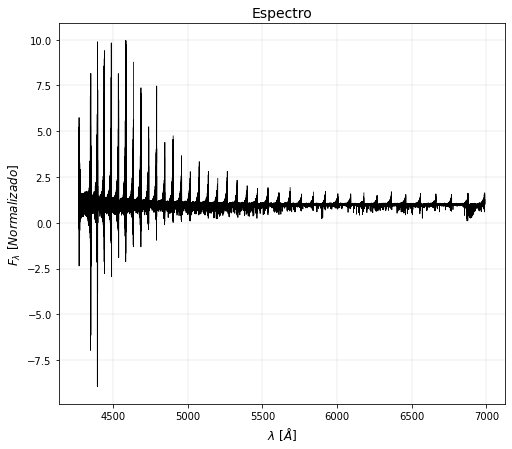

In [77]:
Espectros('2022-03-28T02_37_18.141363-s-rich.sp.fits')

**Nota:** Este sería el primer espectro completo de la estrella, ahora debemos analizar entonces las líneas y la posibilidad de que en las primeras longitudes de onda encontremos ruido.

0-  Object name

1-  BJD

2-  RV

3-  error in RV

4-  Bisector span

5-  error in bisector span

6-  instrument

7-  pipeline

8-  resolving power

9-  Efective Temperture

10- log(g)

11- [Fe/H]

12- v*sin(i)

13- value of the continuum normalized CCF at it lowest point

14- standard deviation of the gaussian fitted to the CCF

15- Exposure time

16- Signal to noise ratio at ~5150 \AA

17- path to the CCF plot file

In [27]:
df = pd.read_csv("results.txt", sep = '\s+', names = ["ID Estrella", "1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"])
df

,ID Estrella,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,TYC6524-876-1,2.459617e+06,315.6384,0.0130,0.075,0.008,fideos,ceres,40000,-999,...,-999.0,-999.0,0.82,4.7,1400.0,63,1.2160,4971.9798,-220.8546,/opt/work/ceres/DATOS/2022-02-06_red/proc/2022...
1,TYC6524-876-1,2.459651e+06,315.5357,0.0098,0.102,0.006,fideos,ceres,40000,-999,...,-999.0,-999.0,0.83,4.5,1400.0,102,1.0878,4971.9821,-66.5448,/opt/work/ceres/DATOS/2022-03-12_red/proc/2022...
2,TYC6524-876-1,2.459657e+06,315.5778,0.0114,0.128,0.007,fideos,ceres,40000,-999,...,-999.0,-999.0,0.83,4.5,1400.0,82,1.0243,4971.9878,-18.2385,/opt/work/ceres/DATOS/2022-03-18_red/proc/2022...
3,TYC6524-876-1,2.459658e+06,315.5968,0.0136,0.208,0.007,fideos,ceres,40000,-999,...,-999.0,-999.0,0.86,4.5,1400.0,80,1.2192,4971.9892,-67.6148,/opt/work/ceres/DATOS/2022-03-19_red/proc/2022...
4,TYC6524-876-1,2.459659e+06,315.5781,0.0091,0.118,0.005,fideos,ceres,40000,-999,...,-999.0,-999.0,0.82,4.5,1400.0,114,1.0423,4971.9877,-39.1958,/opt/work/ceres/DATOS/2022-03-20_red/proc/2022...
5,TYC6524-876-1,2.459662e+06,315.5318,0.0120,0.119,0.007,fideos,ceres,40000,-999,...,-999.0,-999.0,0.84,4.5,1400.0,80,1.1793,4971.9859,-31.4065,/opt/work/ceres/DATOS/2022-03-23_red/proc/2022...
6,TYC6524-876-1,2.459665e+06,315.5052,0.0102,0.024,0.006,fideos,ceres,40000,-999,...,-999.0,-999.0,0.84,4.5,1400.0,106,1.3164,4971.9893,-51.3127,/opt/work/ceres/DATOS/2022-03-26_red/proc/2022...
7,TYC6524-876-1,2.459667e+06,315.5417,0.0118,0.070,0.006,fideos,ceres,40000,-999,...,-999.0,-999.0,0.85,4.6,1400.0,97,1.3319,4971.9886,-57.1283,/opt/work/ceres/DATOS/2022-03-28_red/proc/2022...


iSpect: 
* Con 'Create' creo (xD) y en 'Segment' creo una región en el espectro, con 'Modify' edito esa región (click derecho mueve hacía la derecha y click izquierdo a la izquierda) y con 'remove' lo puedo quitar.
* Por otro lado para calcular velocidad radial, en 'Parameters' y le doy la primera opción 'Determine velocity relative to...', luego 'Atomic line mask (radial velocity)', escojo la mejor para dichas líneas (mask linelist).
* Operaciones, ahí aparece 'correct velocity relative', la primera opción que dice Atomics algo..
* Opción por espectro, (abajo hay un cuadro de proceso que me permite ver si terminó de realizar la tarea)
* Luego en 'Create' 'Lines' y así seleccionamos la línea específica que queremos mirar, dandole el nombre respectivo.